In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
df = pd.read_csv('../MACH_data/raw_data_for_EDA.csv')
df

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,orientation,race,voted,married,familysize,major,score,v_score,t_score,m_score
0,3.0,6.0,21.0,3.0,7.0,19.0,5.0,20.0,15.0,2.0,...,Heterosexual,Black,Yes,Currently married,5,Marketing,75.0,35.0,33.0,7.0
1,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Heterosexual,White,No,Never married,2,mathematics,91.0,37.0,45.0,9.0
2,5.0,16.0,4.0,5.0,12.0,3.0,1.0,2.0,7.0,1.0,...,Bisexual,Asian,No,Never married,2,Chemistry,98.0,43.0,45.0,10.0
3,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Heterosexual,White,Yes,Previously married,2,international relations,78.0,37.0,36.0,5.0
4,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Homosexual,White,Yes,Never married,2,Management,85.0,35.0,41.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Heterosexual,Asian,No,Currently married,1,business,59.0,28.0,26.0,5.0
73485,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Homosexual,White,No,Never married,2,sociology,90.0,37.0,43.0,10.0
73486,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Heterosexual,White,No,Never married,3,NaN,69.0,34.0,27.0,8.0
73487,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,Heterosexual,Asian,Yes,Never married,4,Business,53.0,25.0,22.0,6.0


### voted

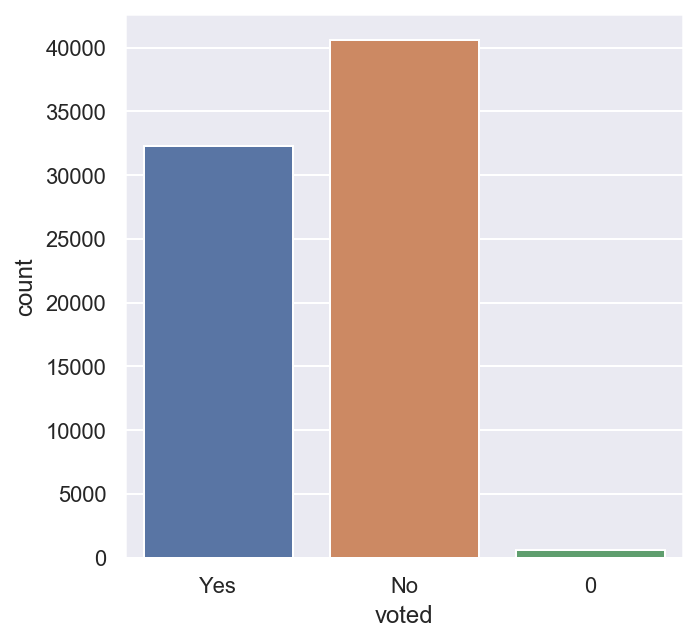

In [74]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df['voted']);

In [75]:
df=df[df['age']>17]

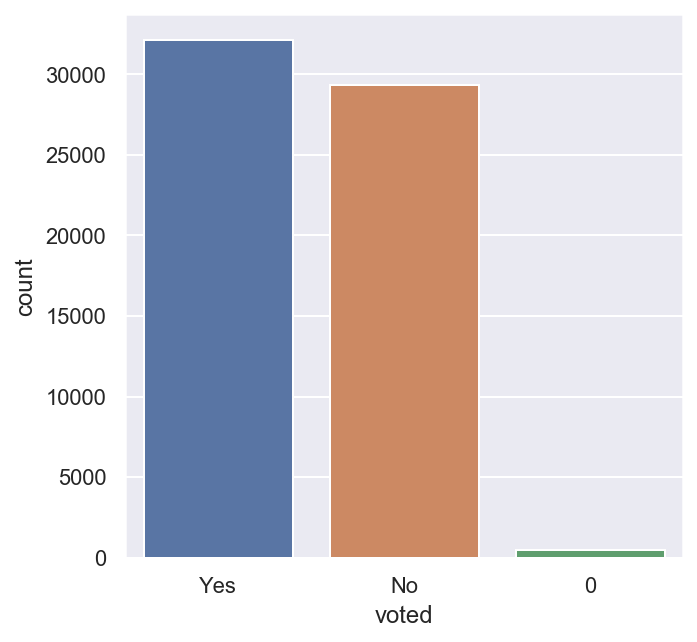

In [76]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df['voted']);

In [77]:
len(df[df['voted']=="Yes"])

32146

In [78]:
len(df[df['voted']=="No"])

29335

### QA

In [79]:
col_list = list(df.columns)
pos_col = []
neg_col = []

for col in col_list:
    if "P" in col and "Y" not in col:
        pos_col.append(col)
    if "N" in col:
        neg_col.append(col)
        
print(pos_col, '\n', '\n', neg_col)

['Q1_TP_notell_2u', 'Q2_TP_ppl_nd_dangun', 'Q5_VP_ppl_bad', 'Q8_VP_ppl_lazy', 'Q12_TP_trust_trouble', 'Q13_VP_ppl_criminal', 'Q15_TP_abu_good', 'Q18_VP_komsu_better', 'Q19_MP_anrocksa_ok', 'Q20_VP_money_good'] 
 
 ['Q3_TN_do_moral', 'Q4_VN_ppl_good', 'Q6_TN_hnsty_best', 'Q7_TN_lying_bad', 'Q9_MN_humble_hnst', 'Q10_TN_hnstly_ask', 'Q11_VN_leader_clean', 'Q14_VN_ppl_brave', 'Q16_TN_ppl_good', 'Q17_VN_ppl_notbad']


#### all

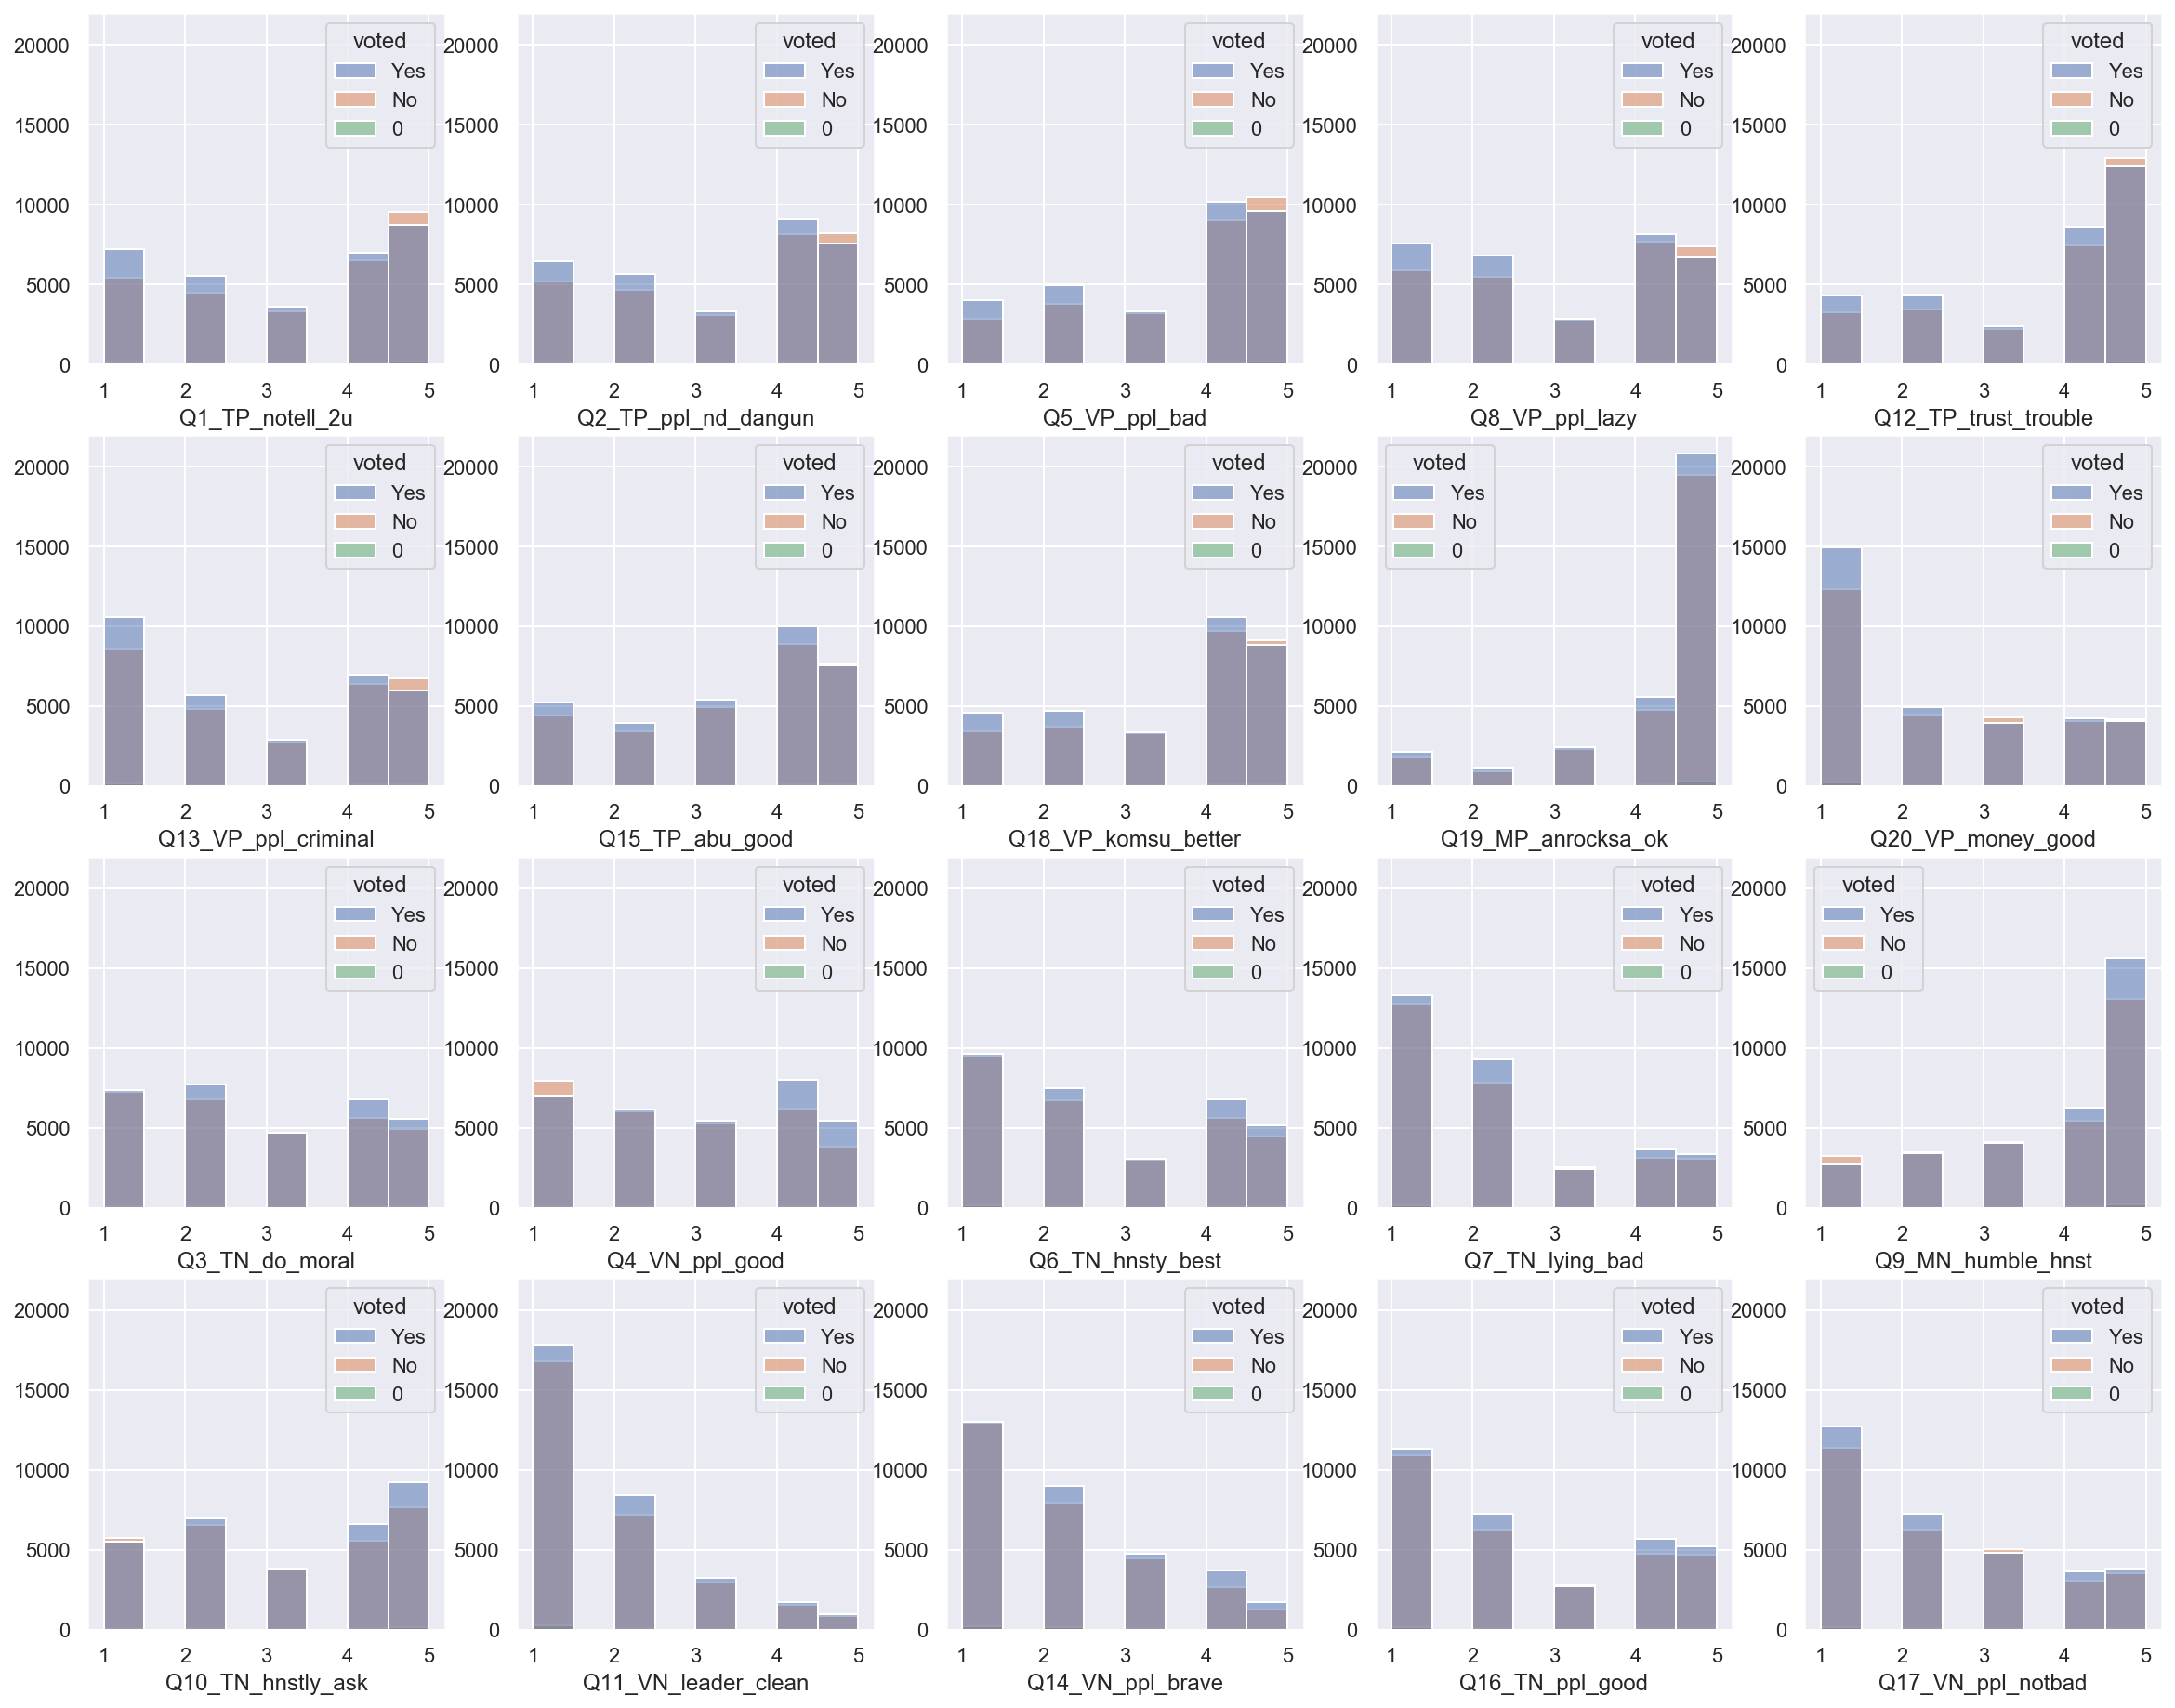

In [80]:
figure, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(nrows=4, ncols=5)
figure.set_size_inches(20,16)

for n, c in enumerate(pos_col):
    ax = globals()["ax" + '{}'.format(n+1)]    
    plt_ = sns.histplot(df, x=c, hue='voted', binwidth=0.5, ax=ax)
    plt_.set(ylabel="", ylim=(0, 22000))

for n, c in enumerate(neg_col):
    ax = globals()["ax" + '{}'.format(n+11)]  
    plt_= sns.histplot(df, x=c, hue='voted', binwidth=0.5, ax=ax)
    plt_.set(ylabel="", ylim=(0, 22000))

#### score

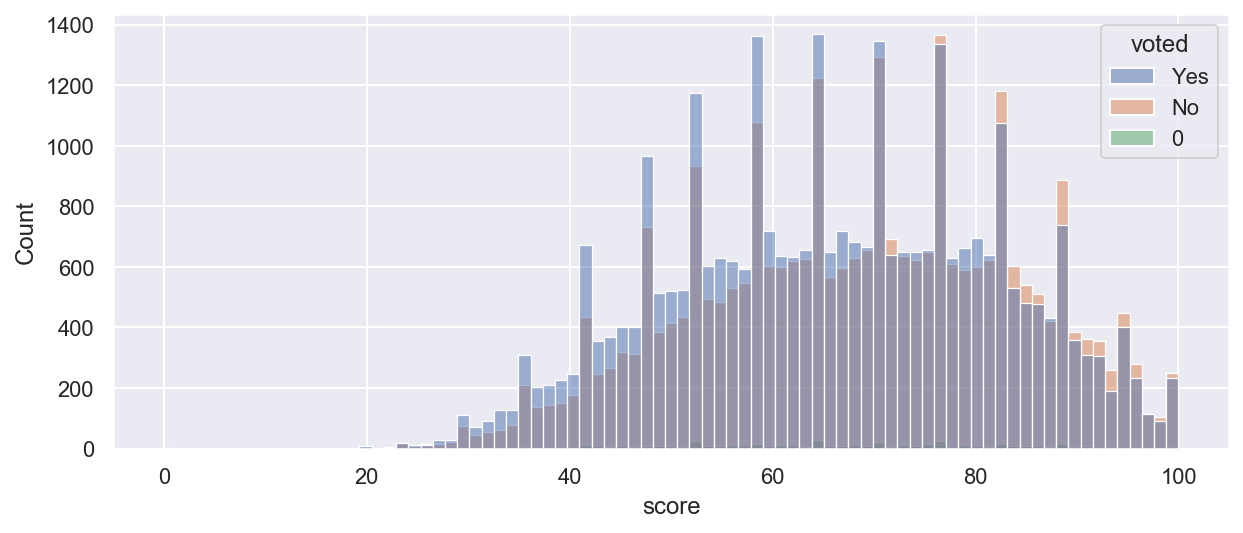

In [81]:
plt.figure(figsize=(10, 4))
sns.histplot(df, x='score', hue='voted')

In [82]:
df["score"].describe()

count    61968.000000
mean        67.053544
std         15.846922
min          0.000000
25%         55.000000
50%         68.000000
75%         79.000000
max        100.000000
Name: score, dtype: float64

In [83]:
len(df[df["score"]<50])/len(df)

0.15332106893880712

### QI

In [84]:
col_list = list(df.columns)
i_col = []

for col in col_list:
    if "I" in col and "Y" not in col:
        i_col.append(col)
print(i_col)

['Q1I', 'Q2I', 'Q3I', 'Q4I', 'Q5I', 'Q6I', 'Q7I', 'Q8I', 'Q9I', 'Q10I', 'Q11I', 'Q12I', 'Q13I', 'Q14I', 'Q15I', 'Q16I', 'Q17I', 'Q18I', 'Q19I', 'Q20I']


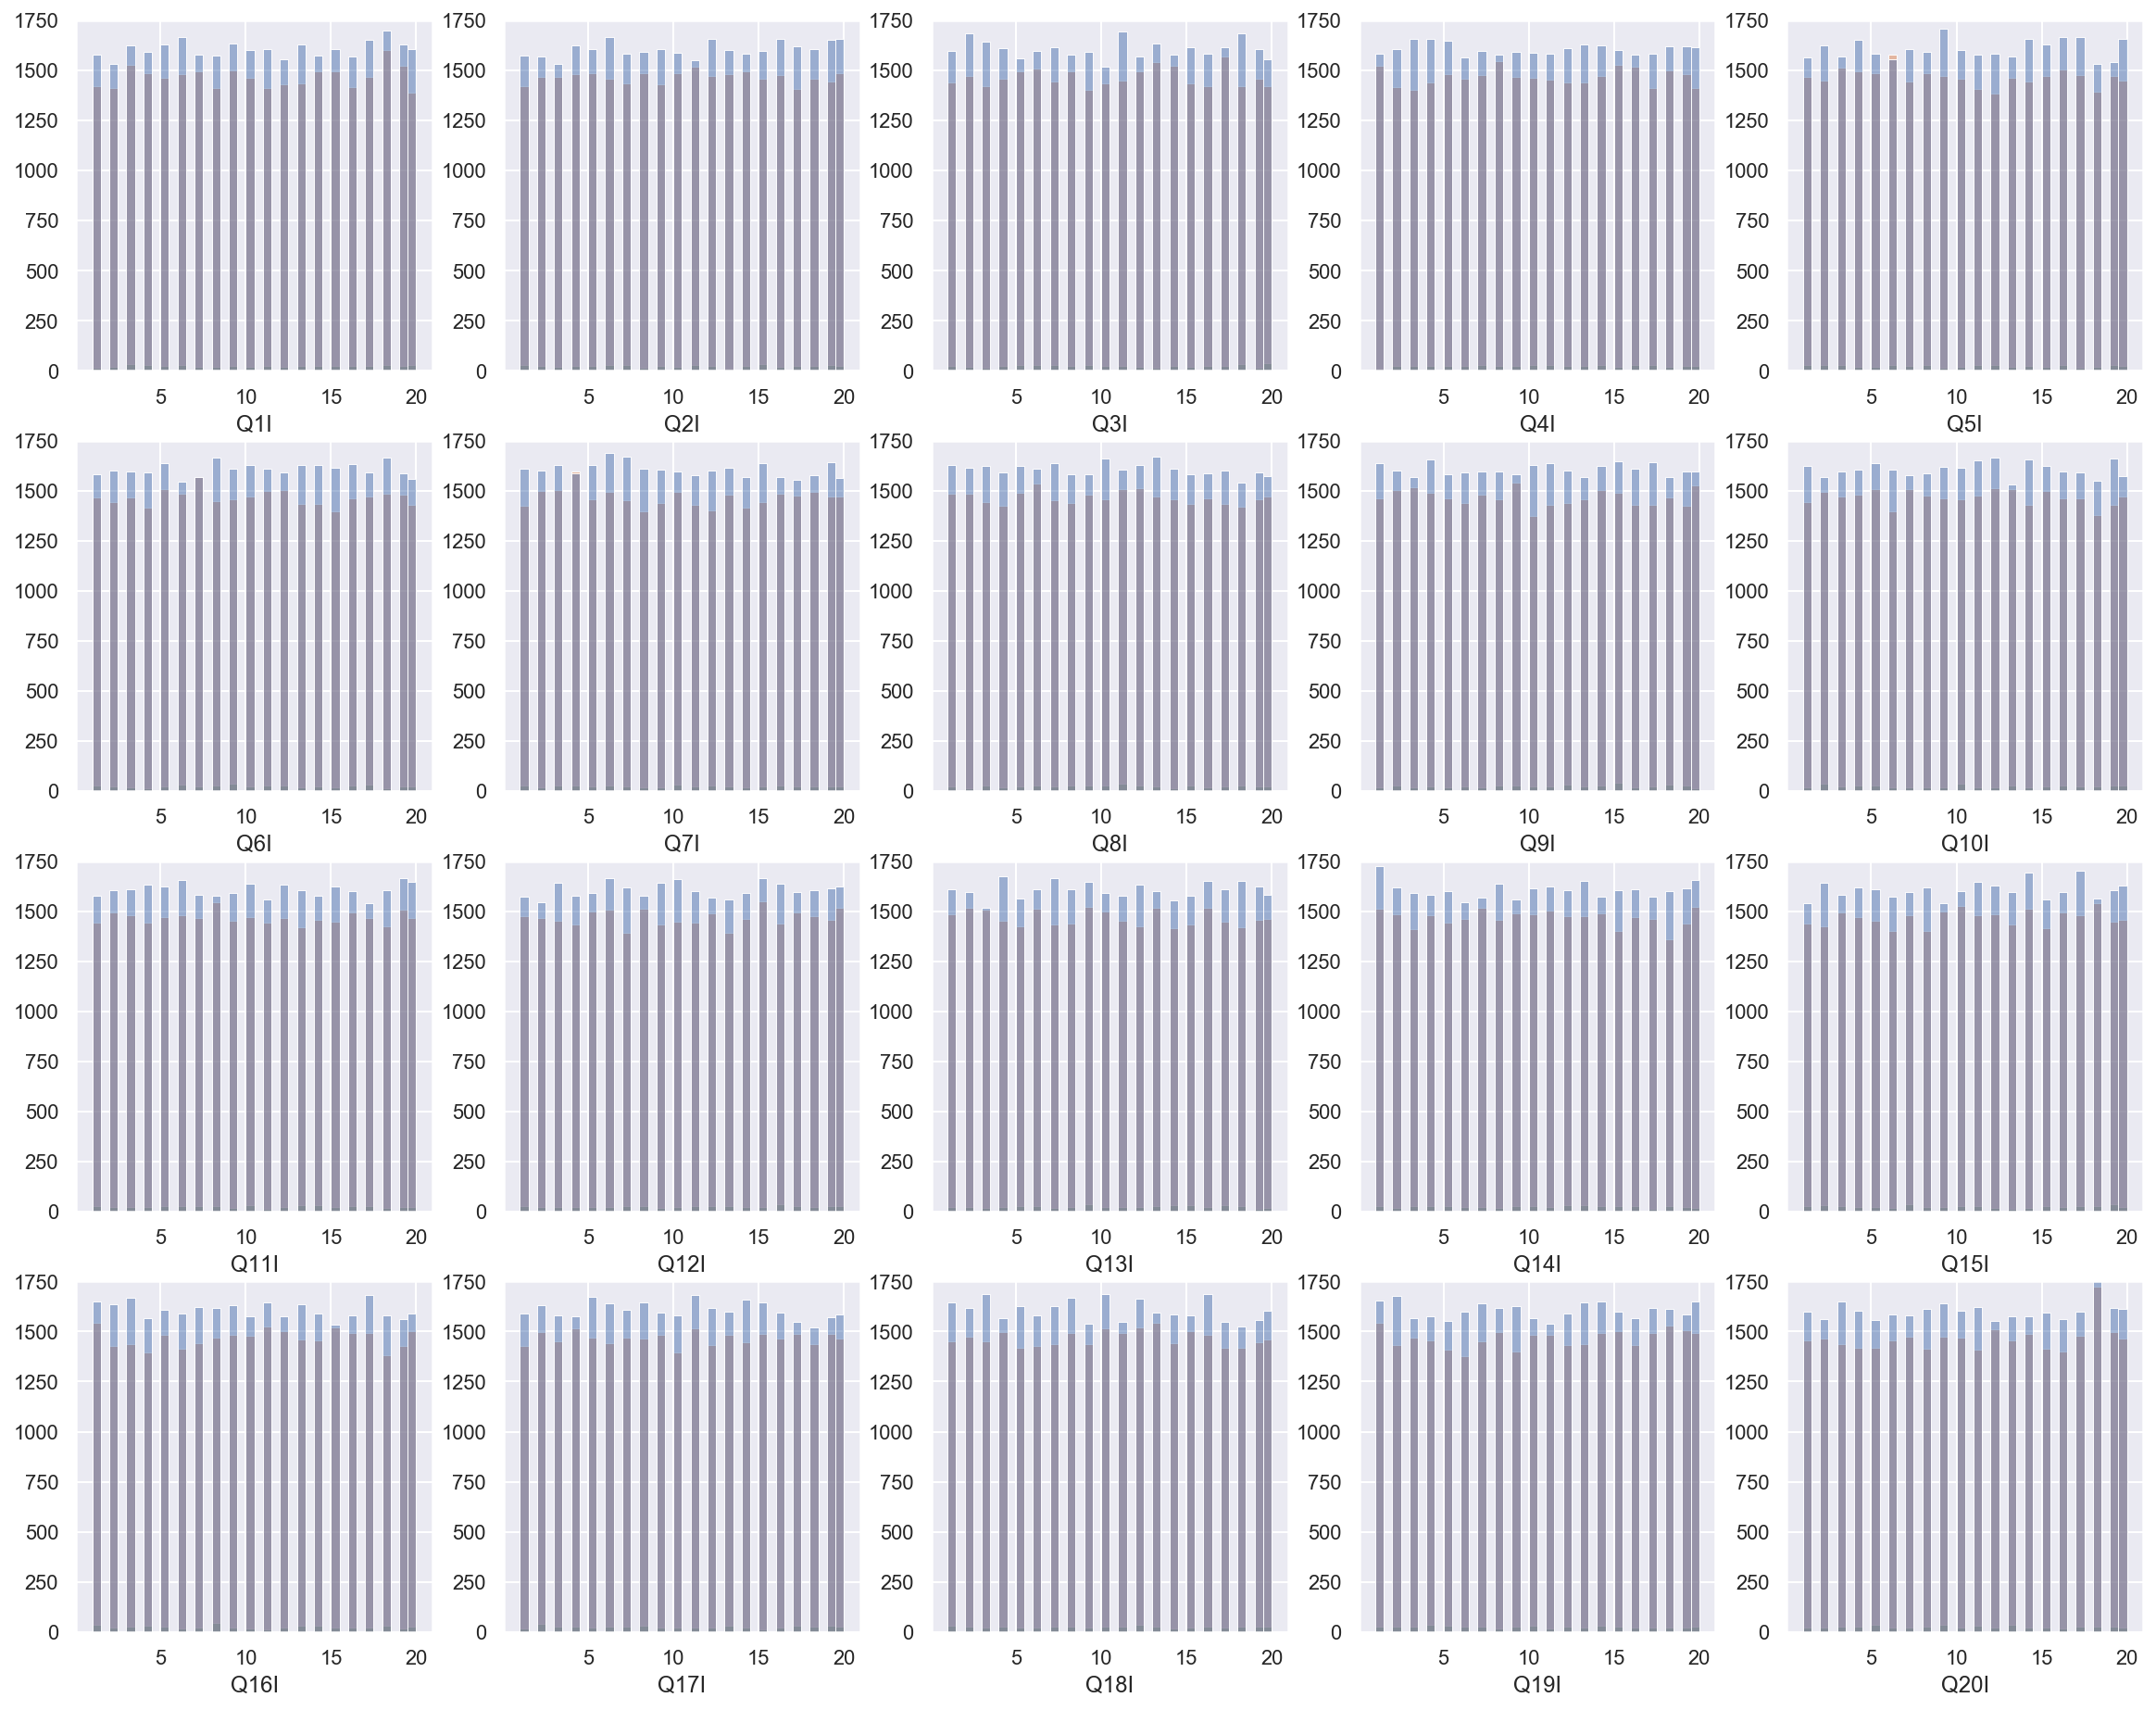

In [85]:
figure, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(nrows=4, ncols=5)
figure.set_size_inches(20,16)

for n, c in enumerate(i_col):
    ax = globals()["ax" + '{}'.format(n+1)]    
    plt_ = sns.histplot(df, x=c, hue='voted', binwidth=0.5, ax=ax, legend=False)
    plt_.set(ylabel="", ylim=(0, 1750))

### QE

In [86]:
e_cols = []
for i in df.columns:
    if  "E" in i :
        e_cols.append(i)
e_cols

['Q1E_notell_2u',
 'Q2E_ppl_nd_dangun',
 'Q3E_do_moral',
 'Q4E_ppl_good',
 'Q5E_ppl_bad',
 'Q6E_hnsty_best',
 'Q7E_lying_bad',
 'Q8E_ppl_lazy',
 'Q9E_humble_hnst',
 'Q10E_hnstly_ask',
 'Q11E_leader_clean',
 'Q12E_trust_trouble',
 'Q13E_ppl_criminal',
 'Q14E_ppl_brave',
 'Q15E_abu_good',
 'Q16E_ppl_good',
 'Q17E_ppl_notbad',
 'Q18E_komsu_better',
 'Q19E_anrocksa_ok',
 'Q20E_money_good']

In [87]:
df_QE = df[e_cols]
df_QE

,Q1E_notell_2u,Q2E_ppl_nd_dangun,Q3E_do_moral,Q4E_ppl_good,Q5E_ppl_bad,Q6E_hnsty_best,Q7E_lying_bad,Q8E_ppl_lazy,Q9E_humble_hnst,Q10E_hnstly_ask,Q11E_leader_clean,Q12E_trust_trouble,Q13E_ppl_criminal,Q14E_ppl_brave,Q15E_abu_good,Q16E_ppl_good,Q17E_ppl_notbad,Q18E_komsu_better,Q19E_anrocksa_ok,Q20E_money_good
0,21.0,19.0,15.0,12.0,21.0,8.0,11.0,10.0,22.0,36.0,11.0,11.0,16.0,11.0,7.0,10.0,26.0,10.0,14.0,36.0
1,4.0,8.0,6.0,6.0,7.0,3.0,11.0,5.0,16.0,9.0,4.0,3.0,6.0,6.0,4.0,5.0,8.0,4.0,14.0,13.0
3,9.0,10.0,10.0,4.0,17.0,5.0,6.0,6.0,11.0,17.0,7.0,7.0,15.0,3.0,6.0,5.0,18.0,7.0,13.0,14.0
4,9.0,5.0,9.0,4.0,32.0,8.0,20.0,10.0,10.0,14.0,9.0,16.0,24.0,7.0,6.0,5.0,24.0,7.0,11.0,22.0
6,4.0,4.0,5.0,2.0,7.0,3.0,4.0,2.0,5.0,5.0,5.0,4.0,3.0,2.0,3.0,3.0,2.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,10.0,14.0,25.0,13.0,46.0,20.0,31.0,20.0,24.0,30.0,29.0,7.0,20.0,15.0,19.0,6.0,47.0,17.0,62.0,38.0
73485,6.0,4.0,7.0,5.0,10.0,5.0,5.0,13.0,7.0,15.0,5.0,4.0,15.0,5.0,3.0,8.0,147.0,4.0,12.0,15.0
73486,5.0,7.0,5.0,4.0,6.0,4.0,4.0,4.0,5.0,7.0,6.0,4.0,9.0,2.0,4.0,5.0,4.0,3.0,9.0,12.0
73487,8.0,8.0,9.0,13.0,14.0,5.0,13.0,12.0,9.0,46.0,20.0,8.0,12.0,5.0,23.0,10.0,14.0,7.0,9.0,1.0


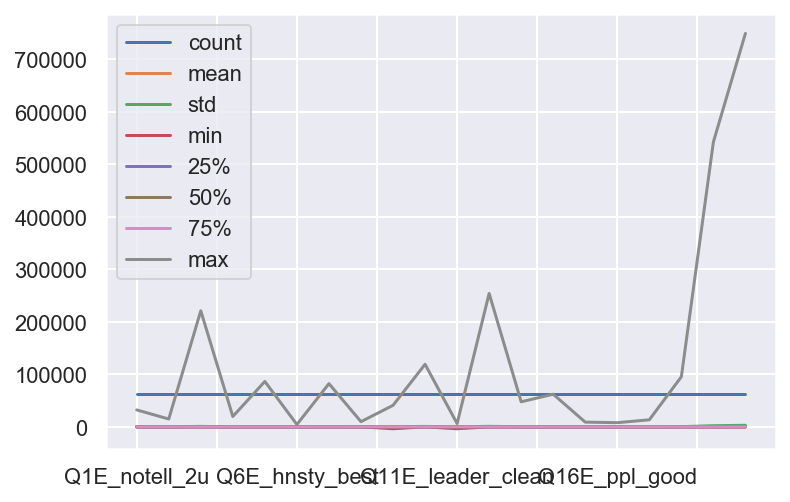

In [88]:
df_QE.describe().T.plot(kind='line')

In [89]:
df_QE.describe()

,Q1E_notell_2u,Q2E_ppl_nd_dangun,Q3E_do_moral,Q4E_ppl_good,Q5E_ppl_bad,Q6E_hnsty_best,Q7E_lying_bad,Q8E_ppl_lazy,Q9E_humble_hnst,Q10E_hnstly_ask,Q11E_leader_clean,Q12E_trust_trouble,Q13E_ppl_criminal,Q14E_ppl_brave,Q15E_abu_good,Q16E_ppl_good,Q17E_ppl_notbad,Q18E_komsu_better,Q19E_anrocksa_ok,Q20E_money_good
count,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000,61966.000000
mean,12.925023,10.975712,17.854775,8.119937,20.933980,7.055240,11.033389,10.789804,14.756899,30.931624,10.600846,14.692493,16.435836,7.961511,9.120760,9.495110,14.067908,13.694365,23.398799,27.596311
std,153.633349,108.834743,925.173428,111.209391,492.997124,40.550745,377.038468,65.433093,213.934323,852.002350,51.653479,1022.569251,311.689030,271.511248,69.535122,76.840133,113.633664,423.117517,2200.206047,3012.357722
min,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,-2.000000,0.000000,-3574.000000,-8.000000,-3554.000000,0.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,-9.000000
25%,5.000000,5.000000,6.000000,3.000000,7.000000,3.000000,4.000000,5.000000,6.000000,9.000000,5.000000,5.000000,6.000000,3.000000,4.000000,4.000000,6.000000,5.000000,6.000000,8.000000
50%,7.000000,6.000000,8.000000,5.000000,9.000000,4.000000,5.000000,7.000000,9.000000,13.000000,7.000000,7.000000,9.000000,4.000000,6.000000,6.000000,8.000000,7.000000,8.000000,11.000000
75%,11.000000,10.000000,12.000000,7.000000,14.000000,7.000000,8.000000,10.000000,13.000000,20.000000,10.000000,10.000000,13.000000,6.000000,8.000000,8.000000,12.000000,10.000000,12.000000,15.000000
max,32310.000000,14948.000000,221153.000000,19766.000000,86529.000000,4480.000000,82346.000000,9901.000000,40985.000000,119251.000000,6254.000000,254156.000000,47758.000000,62220.000000,9006.000000,7989.000000,13439.000000,95517.000000,542805.000000,749602.000000


Text(0.5, 1.0, 'max')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48296 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51608 missing from c

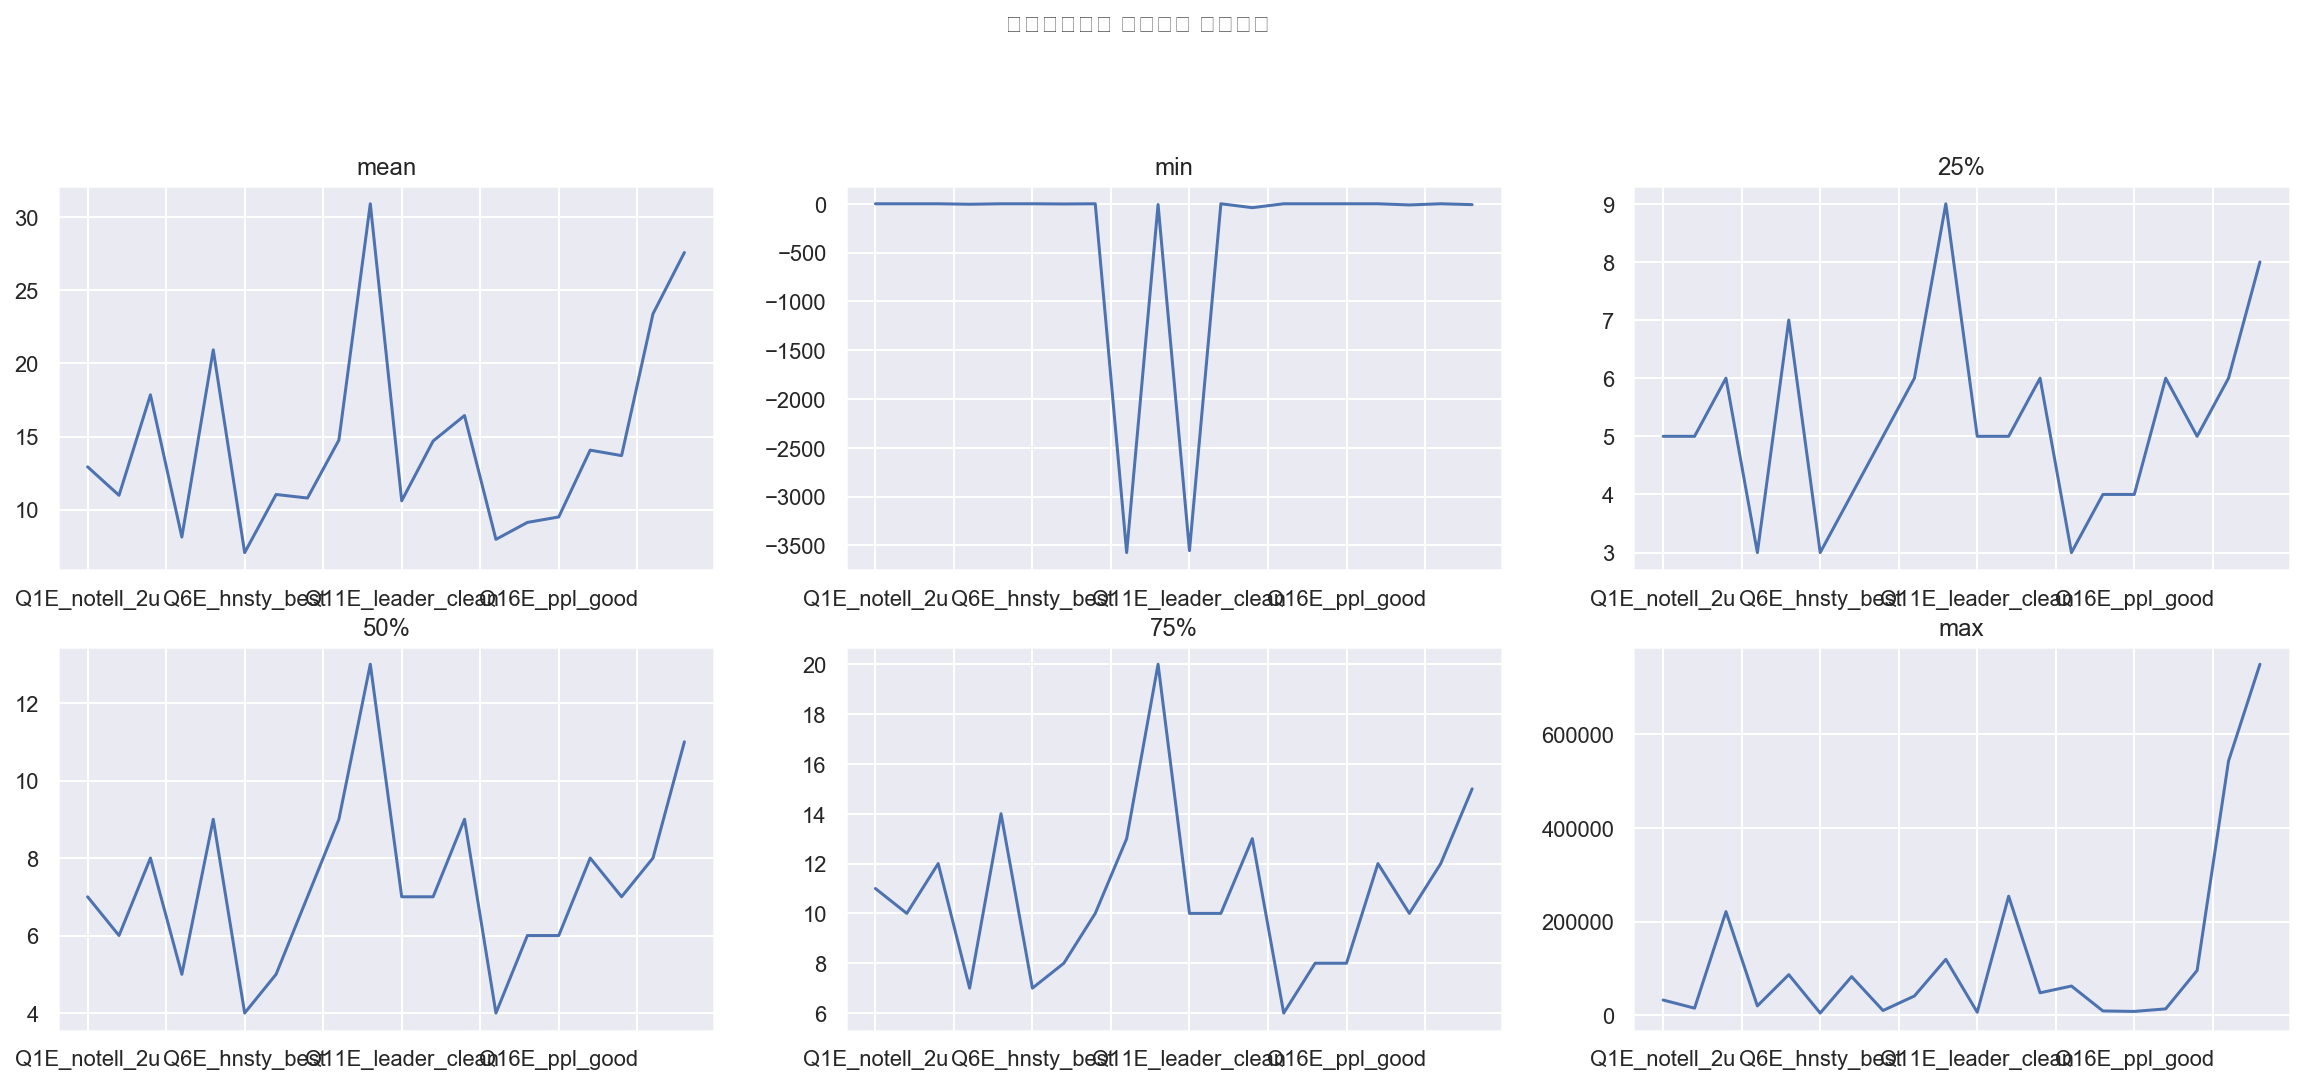

In [90]:
plt.figure(figsize=(20, 12))
plt.suptitle('마키아벨리즘 질문지별 답변시간')

plt.subplot(331)
df_QE.describe().loc['mean'].plot(kind='line')
plt.gca().set_title('mean')

plt.subplot(332)
df_QE.describe().loc['min'].plot(kind='line')
plt.gca().set_title('min')

plt.subplot(333)
df_QE.describe().loc['25%'].plot(kind='line')
plt.gca().set_title('25%')

plt.subplot(334)
df_QE.describe().loc['50%'].plot(kind='line')
plt.gca().set_title('50%')

plt.subplot(335)
df_QE.describe().loc['75%'].plot(kind='line')
plt.gca().set_title('75%')

plt.subplot(336)
df_QE.describe().loc['max'].plot(kind='line')
plt.gca().set_title('max')

### TYP

In [91]:
col_list = list(df.columns)
typ_col = []

for col in col_list:
    if "TYP" in col:
        typ_col.append(col)
print(typ_col)

['TYP_out', 'TYP_fight', 'TYP_depnd', 'TYP_anx', 'TYP_try', 'TYP_quiet', 'TYP_warm', 'TYP_disorg', 'TYP_calm', 'TYP_stable']


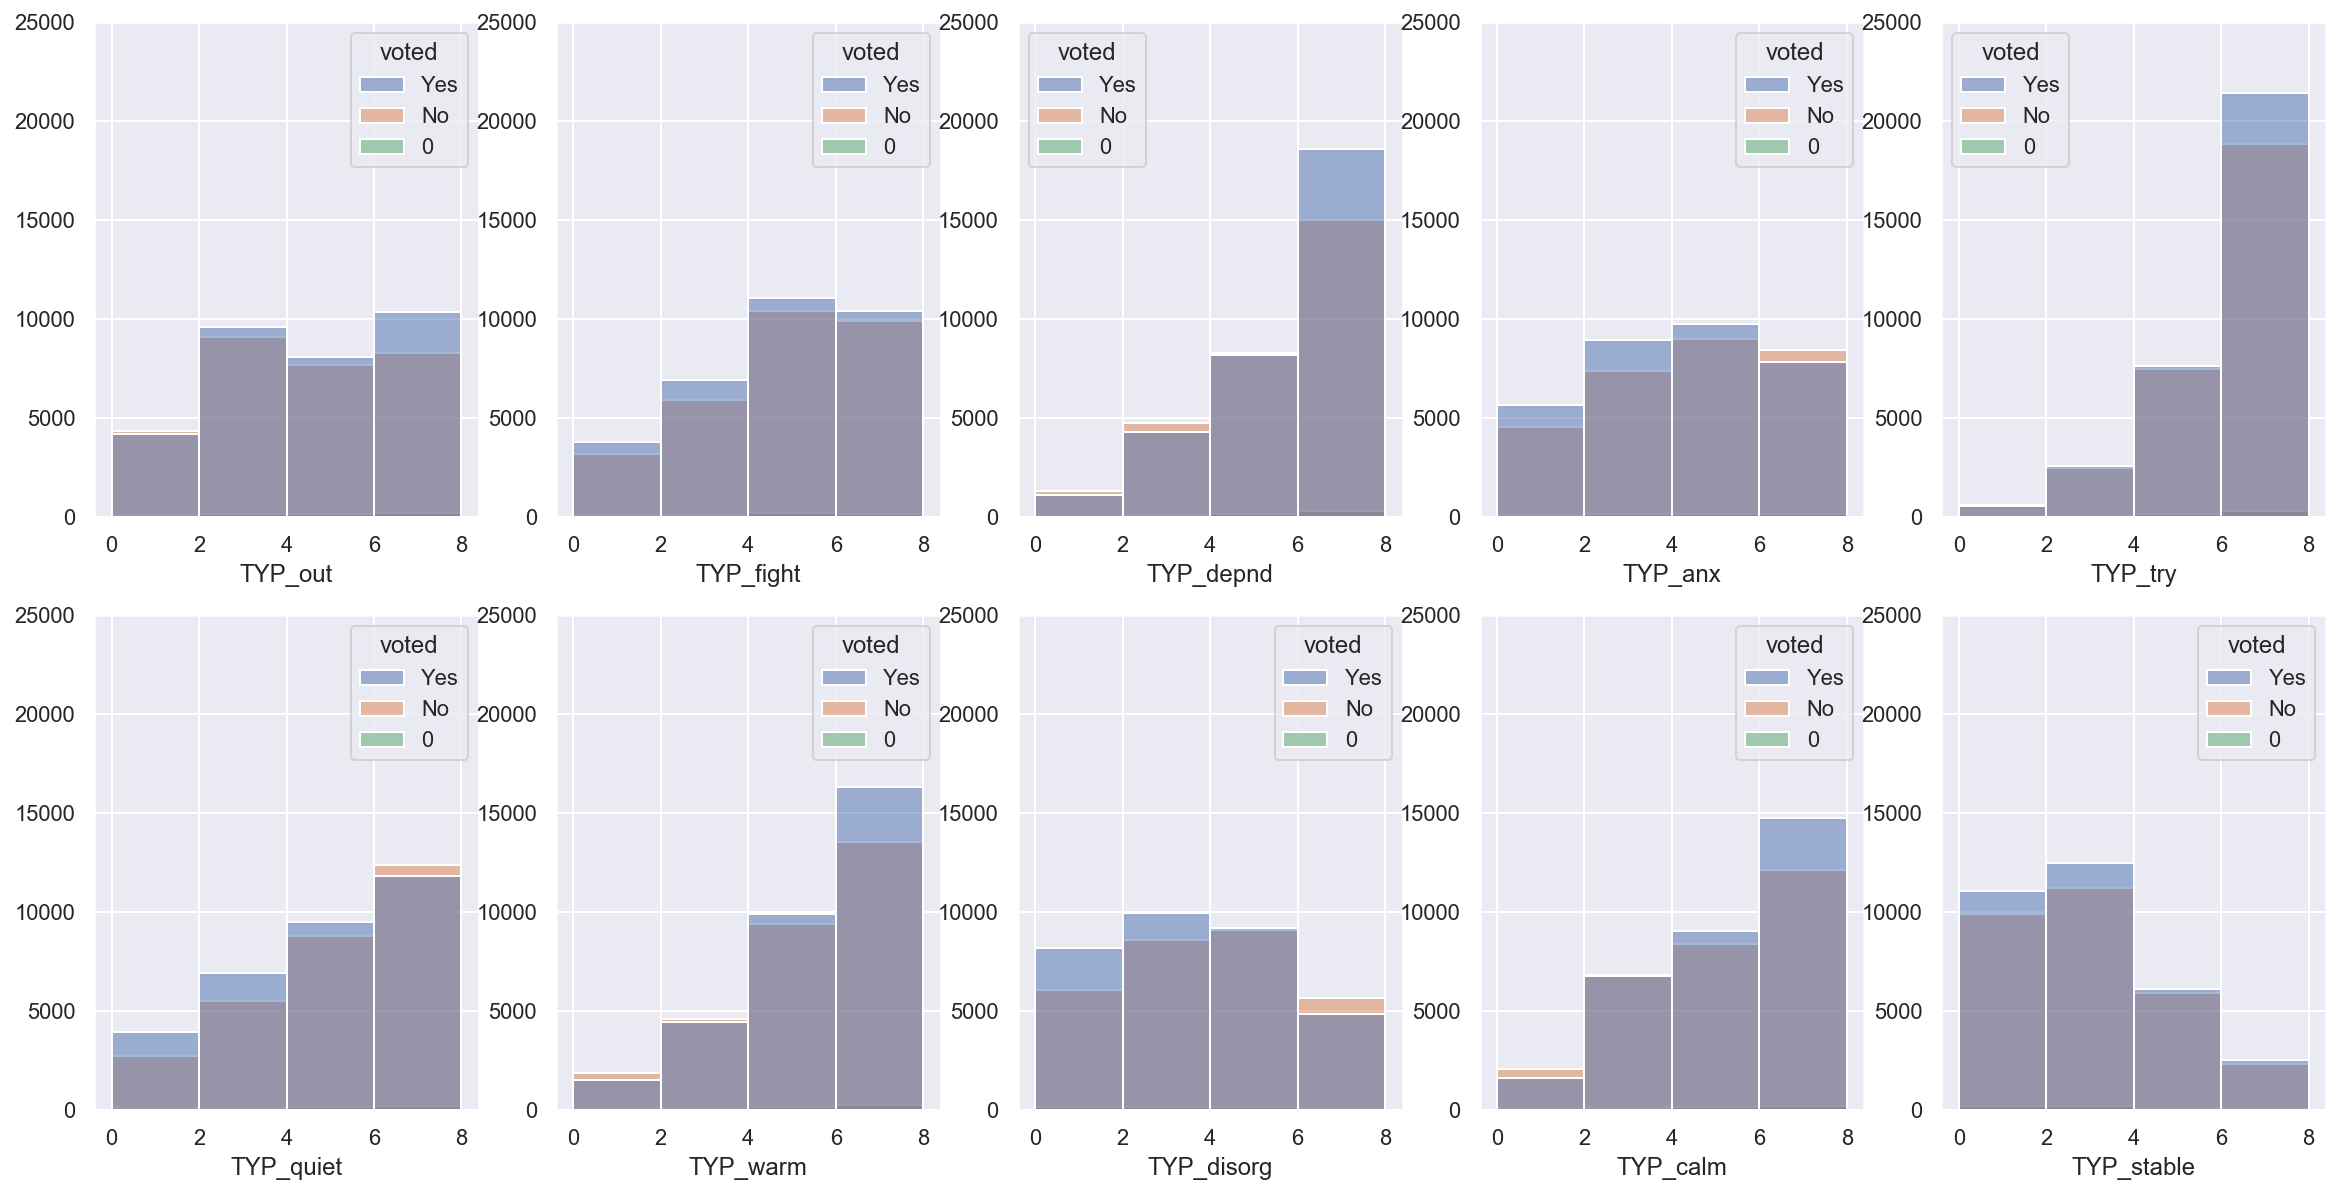

In [92]:
figure, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(20,10)

for n, c in enumerate(typ_col):
    ax = globals()["ax" + '{}'.format(n+1)]
    
    plt_ = sns.histplot(df, x=c, hue='voted', binwidth=2, ax=ax)
    plt_.set(ylabel="", ylim=(0, 25000))

### VCL

In [93]:
v_cols = []
for i in df.columns:
    if  ("VCL" in i ) | ('voted' in i ):
        v_cols.append(i)
v_cols

['VCL1',
 'VCL2',
 'VCL3',
 'VCL4',
 'VCL5',
 'VCL6_F',
 'VCL7',
 'VCL8',
 'VCL9_F',
 'VCL10',
 'VCL11',
 'VCL12_F',
 'VCL13',
 'VCL14',
 'VCL15',
 'VCL16',
 'voted']

In [94]:
df_vcl = df[v_cols]
df_vcl

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6_F,VCL7,VCL8,VCL9_F,VCL10,VCL11,VCL12_F,VCL13,VCL14,VCL15,VCL16,voted
0,know,know,n_know,know,know,n_know,n_know,know,n_know,know,know,know,know,know,know,know,Yes
1,know,know,know,know,know,n_know,n_know,know,n_know,know,n_know,n_know,know,know,know,know,No
3,know,know,know,know,know,n_know,n_know,know,n_know,know,n_know,know,n_know,know,know,know,Yes
4,know,n_know,n_know,know,know,n_know,n_know,n_know,n_know,know,n_know,n_know,n_know,n_know,know,know,Yes
6,know,know,n_know,know,know,n_know,n_know,n_know,n_know,know,n_know,n_know,know,know,know,know,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,know,n_know,n_know,know,know,n_know,n_know,n_know,n_know,know,n_know,n_know,n_know,n_know,know,know,No
73485,know,n_know,n_know,know,know,n_know,n_know,know,n_know,know,n_know,n_know,n_know,n_know,know,know,No
73486,know,know,know,know,know,n_know,know,n_know,n_know,know,n_know,n_know,know,know,know,know,No
73487,n_know,n_know,n_know,n_know,know,n_know,n_know,n_know,n_know,know,n_know,n_know,n_know,know,know,know,Yes


In [95]:
df_vcl.columns

Index(['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6_F', 'VCL7', 'VCL8',
       'VCL9_F', 'VCL10', 'VCL11', 'VCL12_F', 'VCL13', 'VCL14', 'VCL15',
       'VCL16', 'voted'],
      dtype='object')

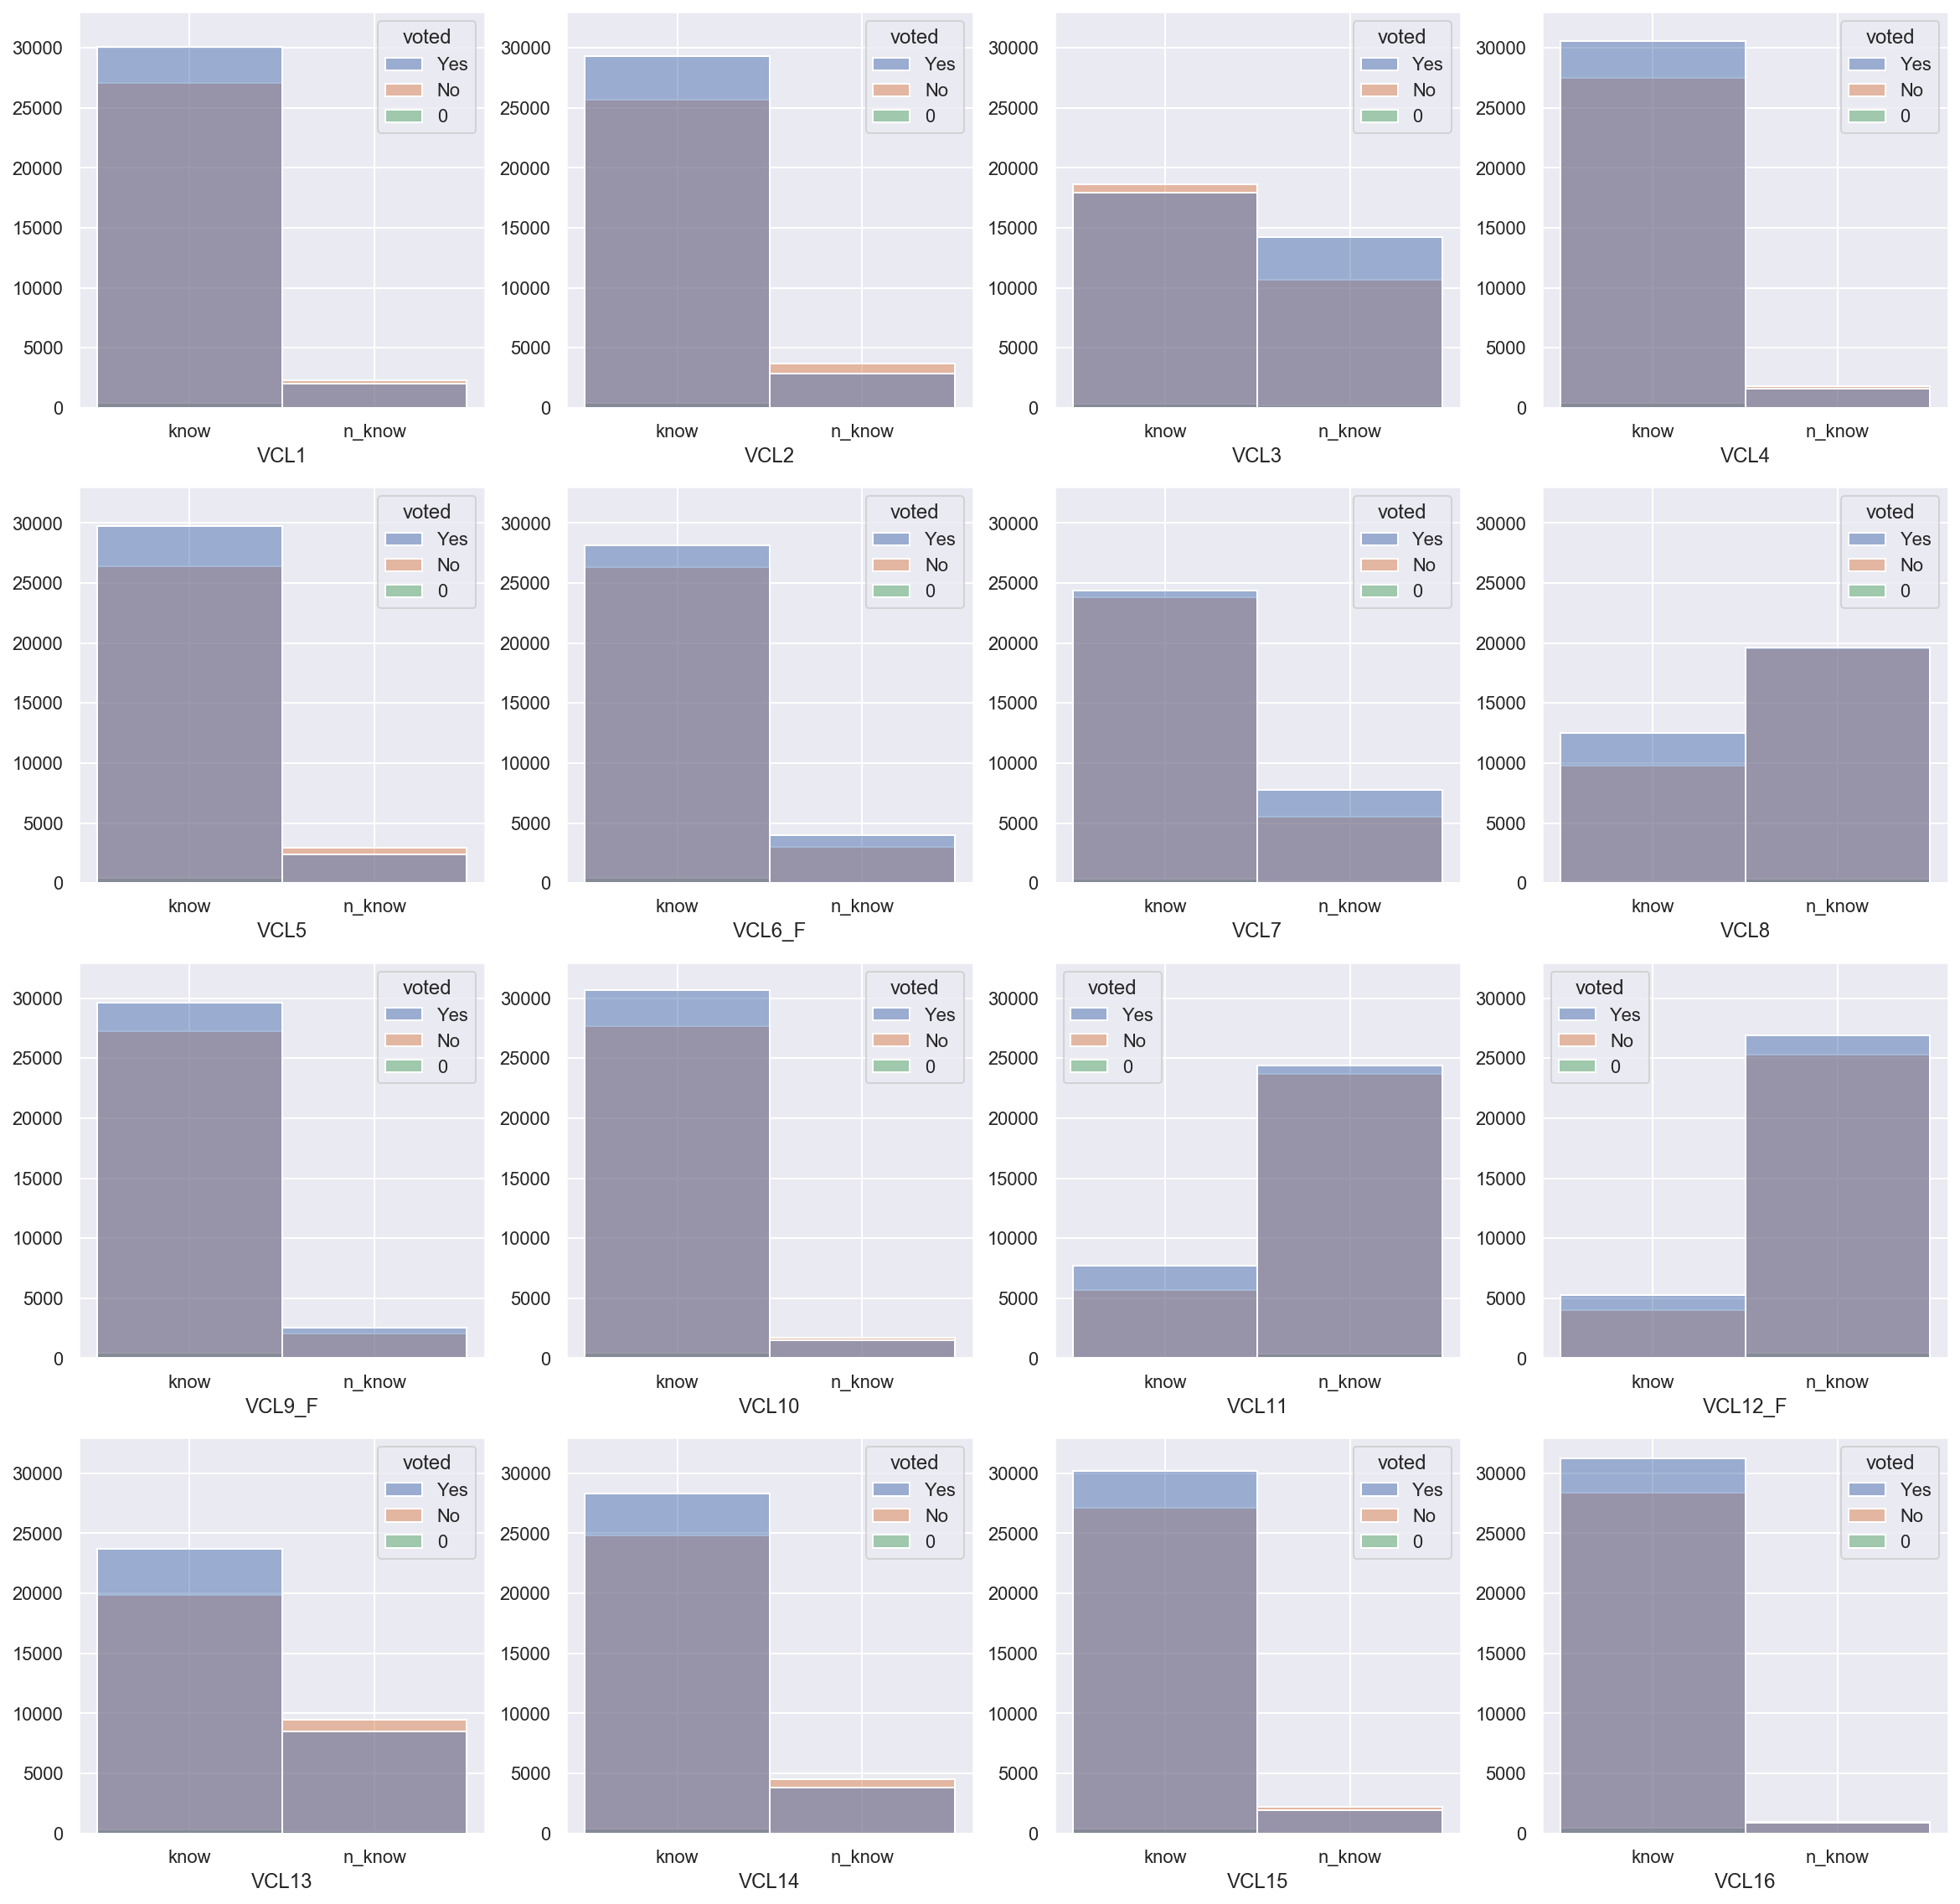

In [96]:
label = ["know", "n_know"]
index=np.arange(len(label))

plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plot1 = sns.histplot(x=df_vcl[df_vcl.columns[i]], hue=df_vcl['voted'])
    plot1.set(ylabel="", ylim=(0, 33000))
    plt.xticks(index, label)
plt.show()

### education

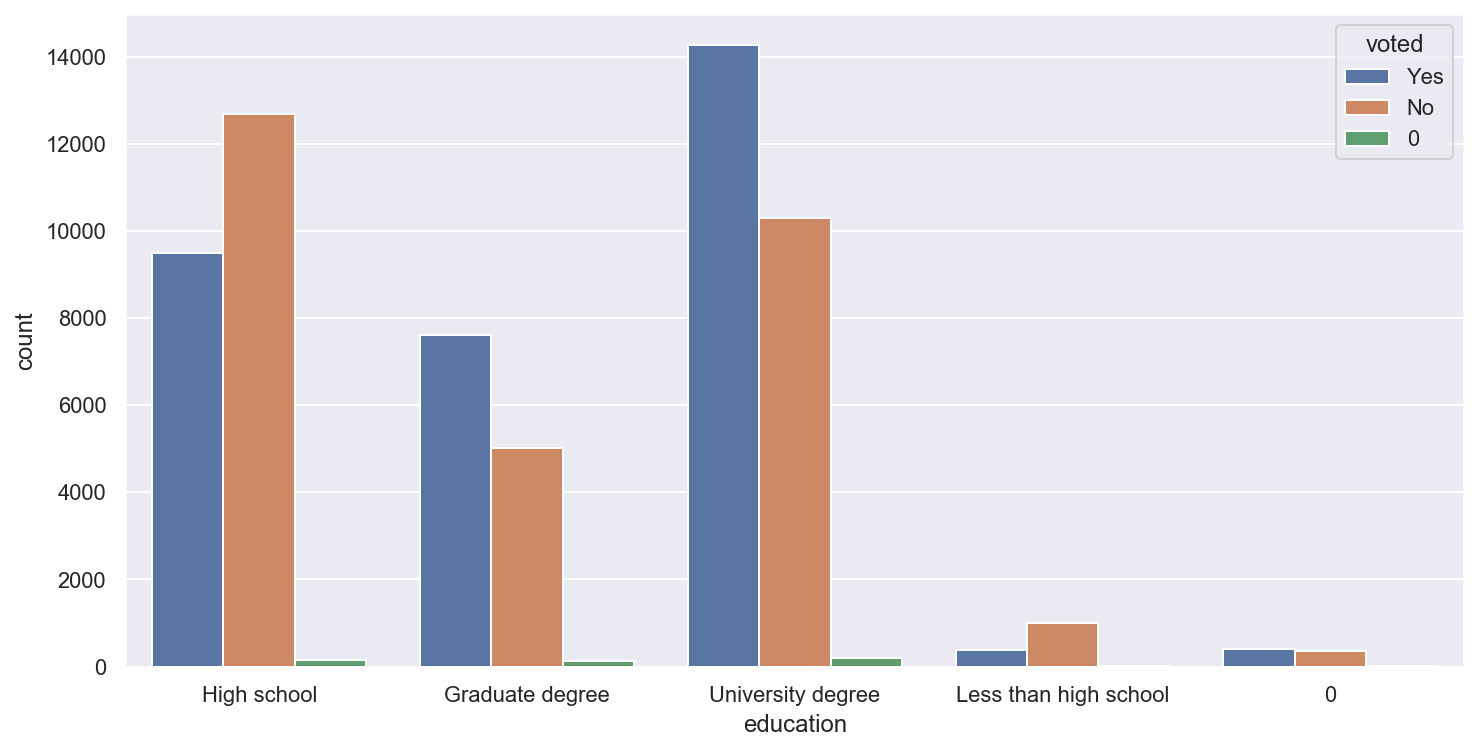

In [97]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['education'], hue=df['voted']);

### hometown

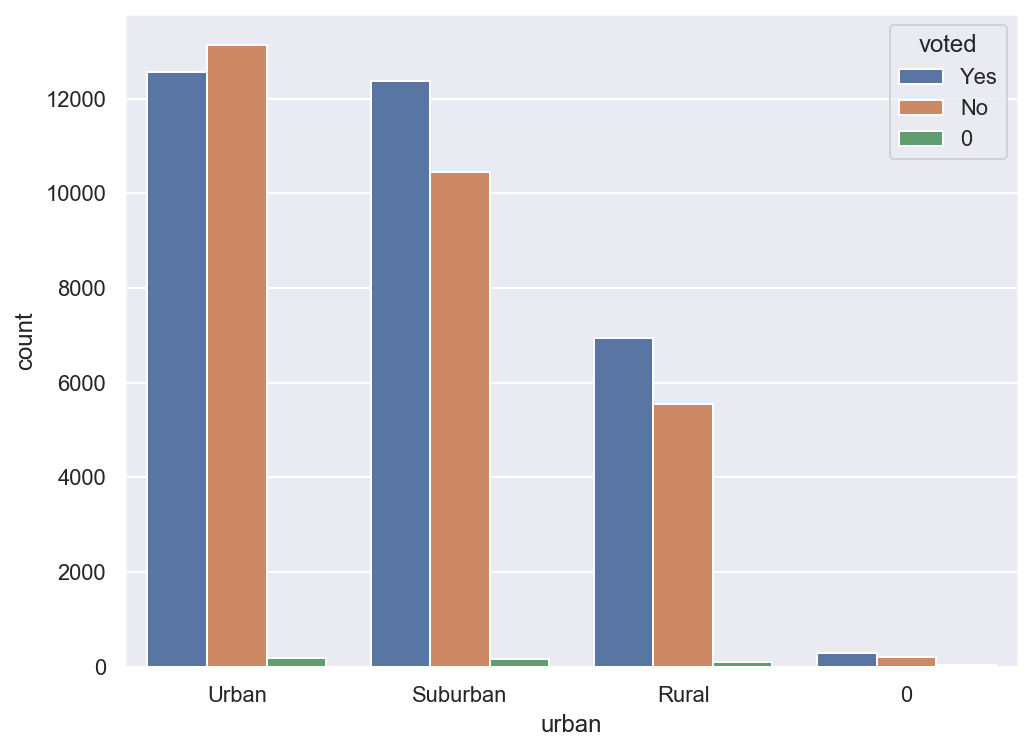

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['urban'], hue=df['voted']);

### gender

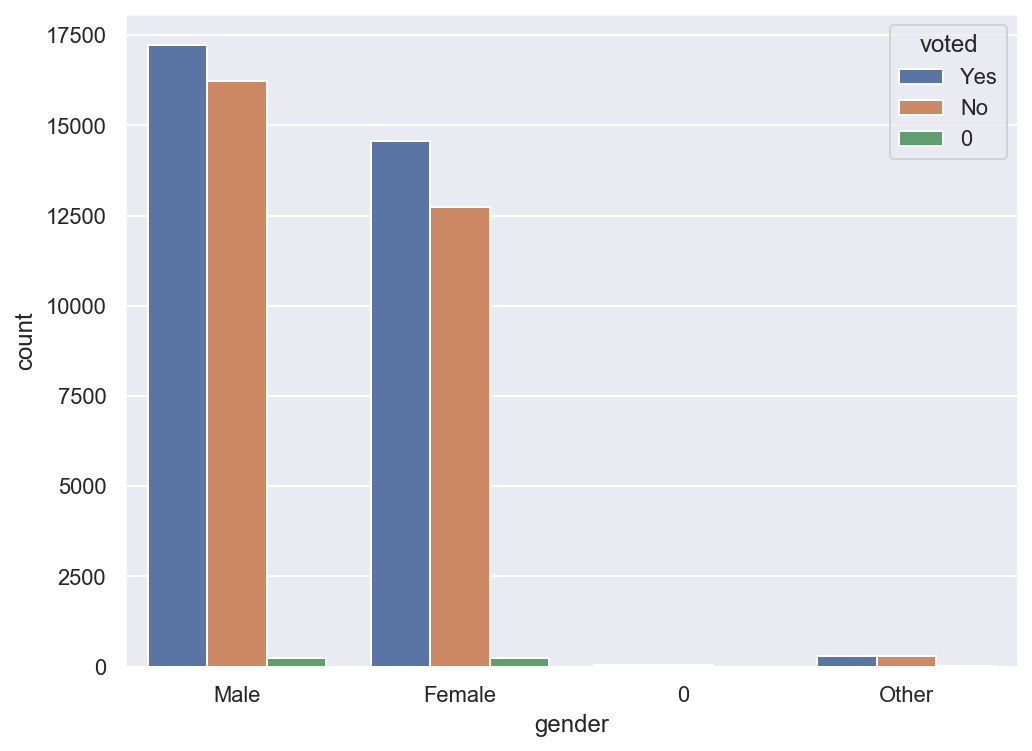

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['gender'], hue=df['voted']);

### first language

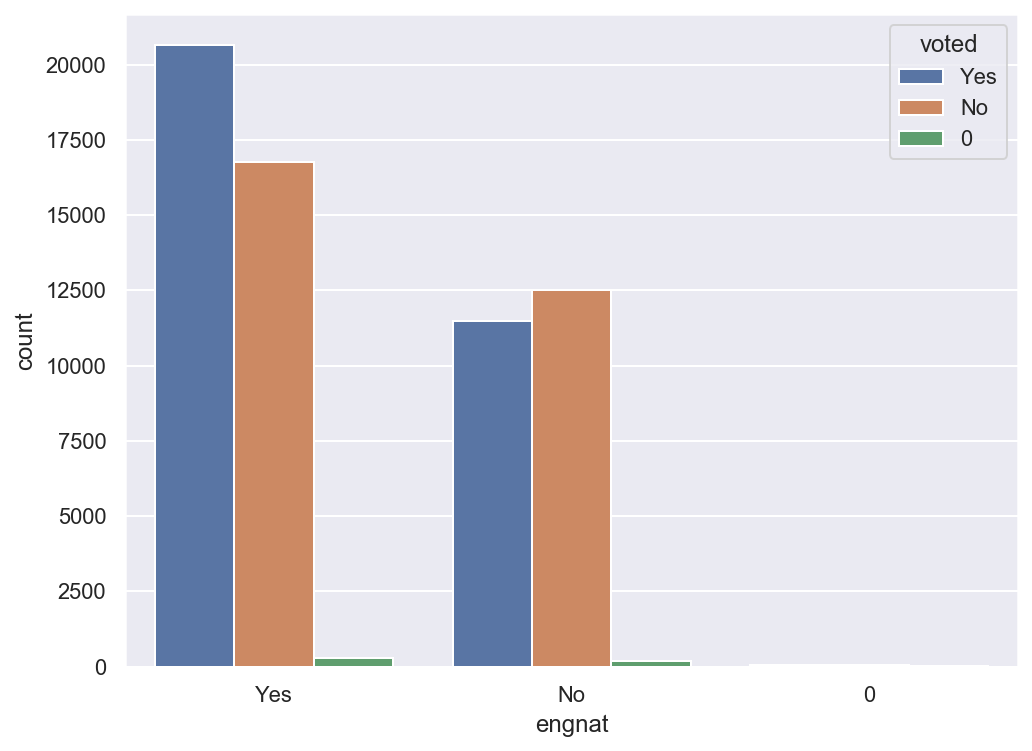

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['engnat'], hue=df['voted']);

### age

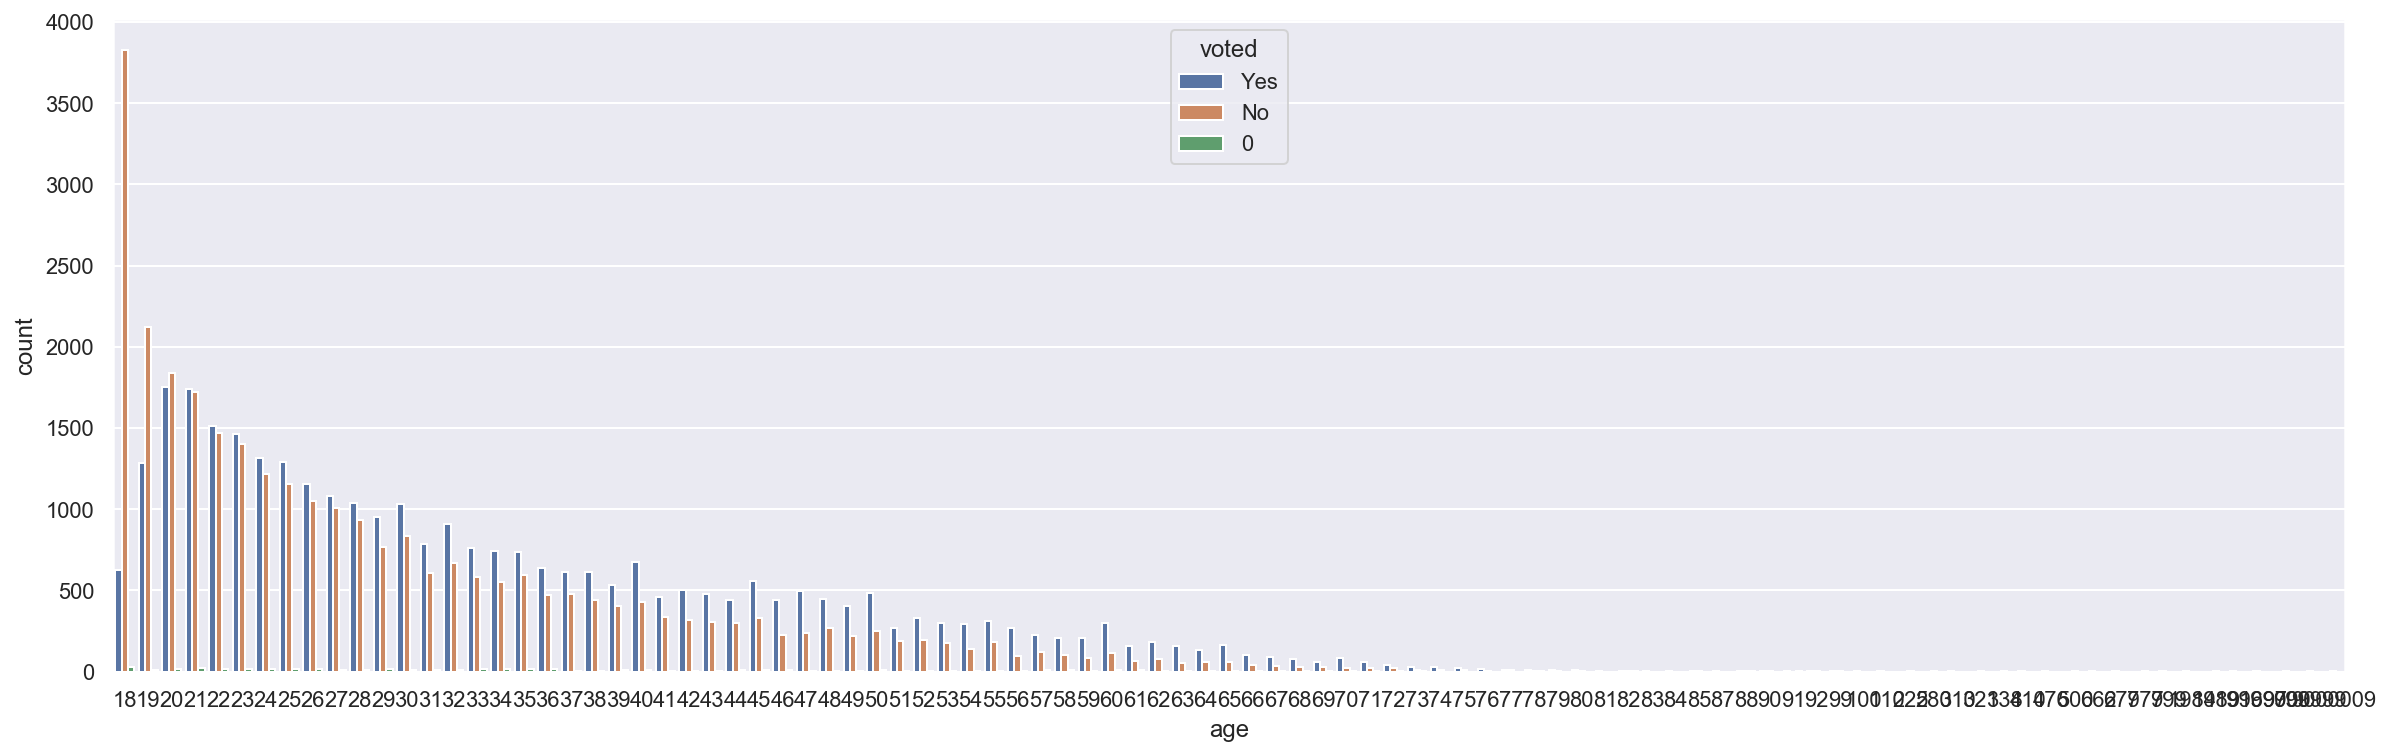

In [101]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['age'], hue=df['voted']);

### hand

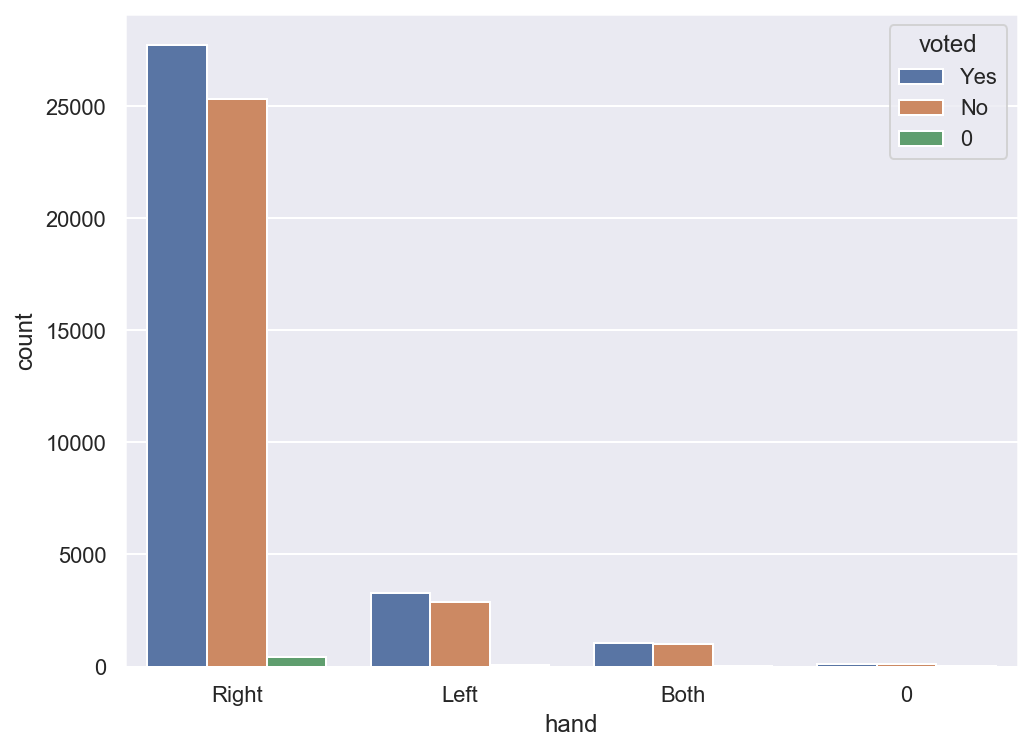

In [102]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['hand'], hue=df['voted']);

In [103]:
df_hand_voted = pd.crosstab(df['hand'], df['voted'])
df_hand_voted["diff"] = (df_hand_voted["Yes"])/(df_hand_voted["Yes"]+df_hand_voted["No"]+df_hand_voted["0"])
df_hand_voted

voted,0,No,Yes,diff
hand,,,,
0,15,126,100,0.414938
Both,12,1002,1048,0.508244
Left,54,2889,3274,0.526621
Right,406,25318,27724,0.518710


### religion

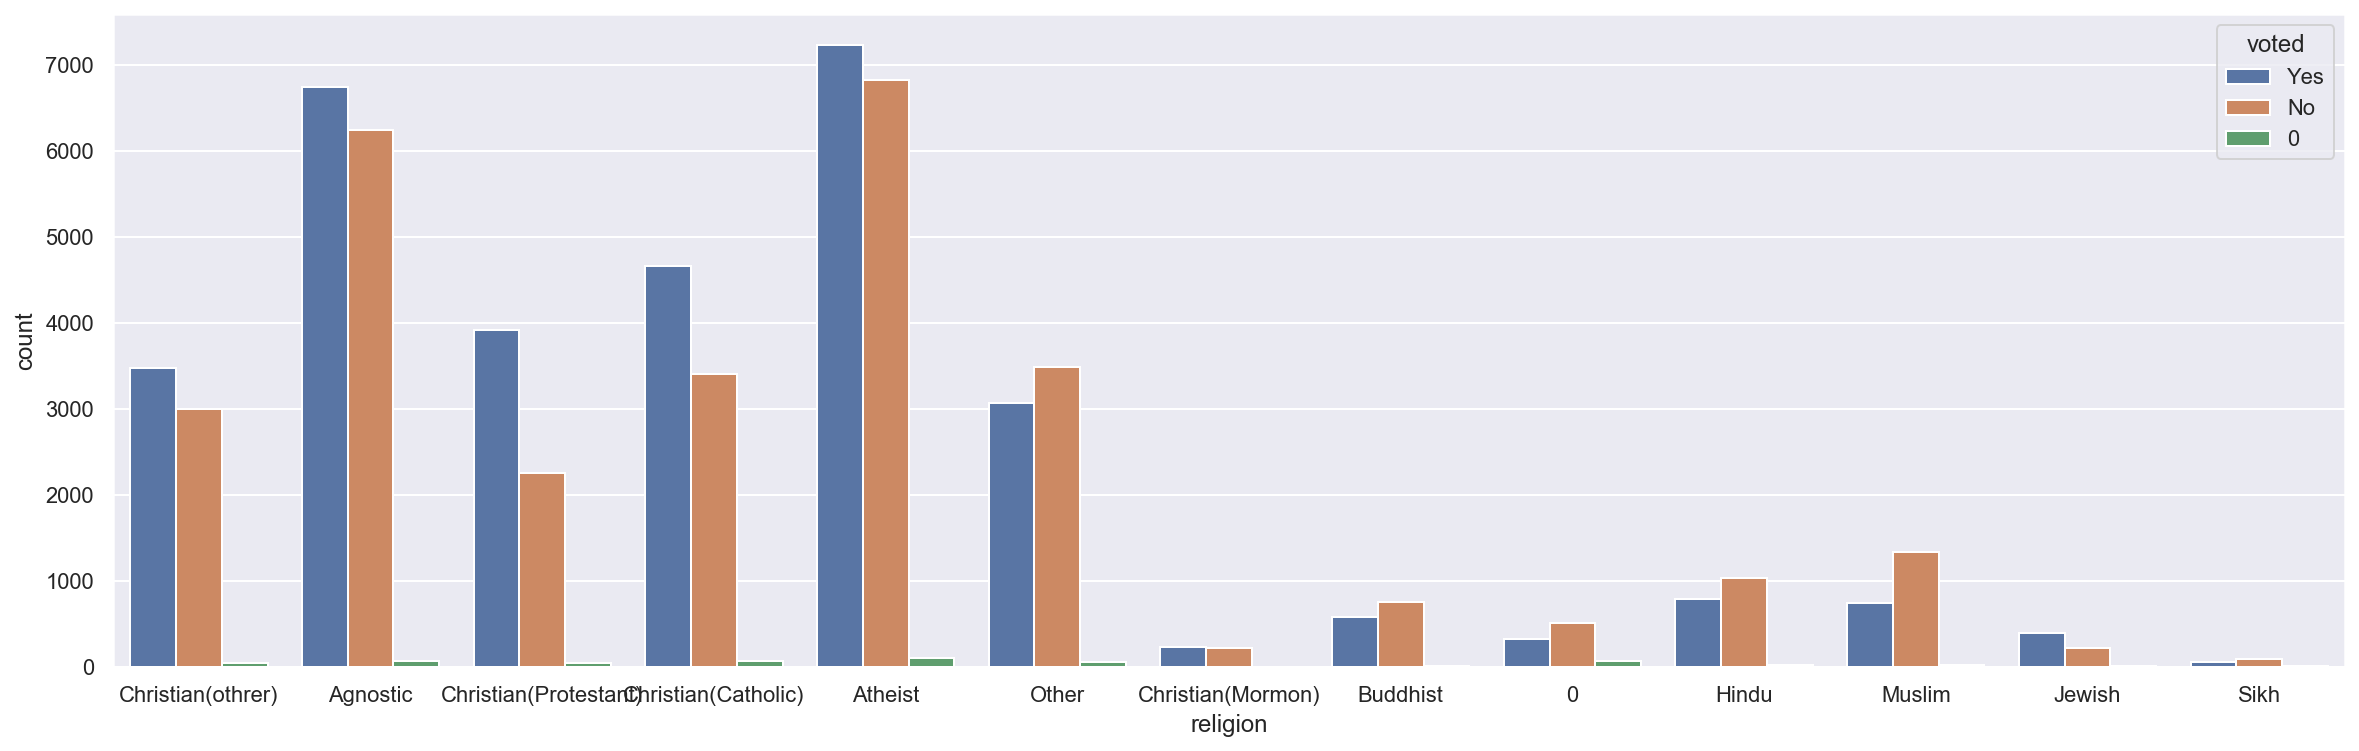

In [104]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['religion'], hue=df['voted']);

### orientation

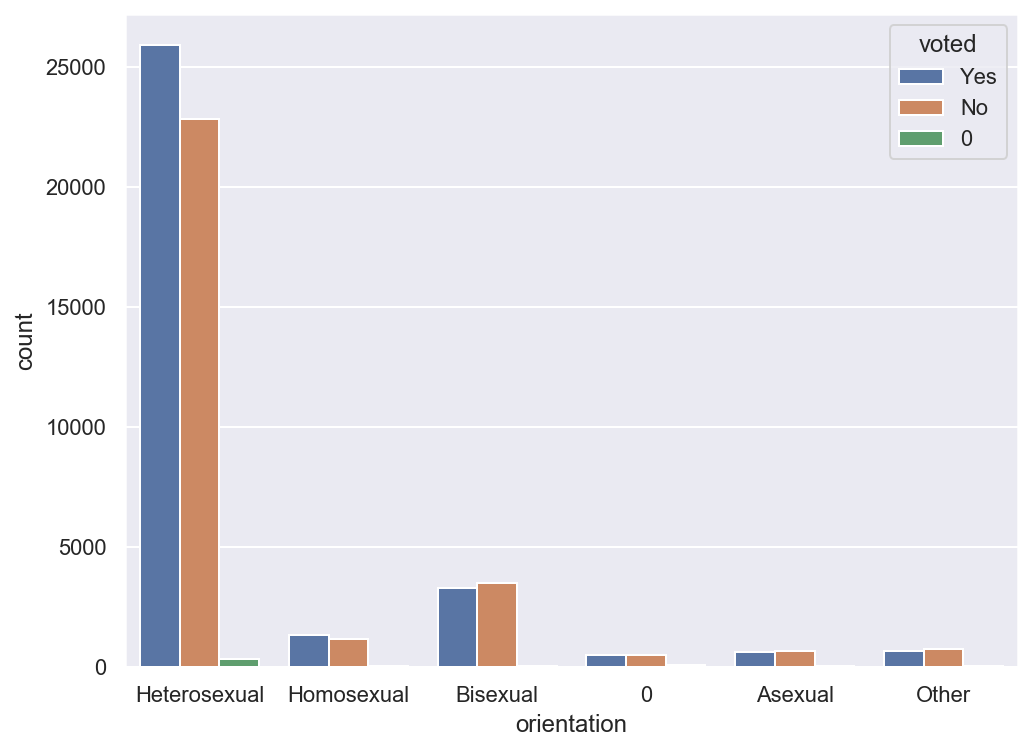

In [105]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['orientation'], hue=df['voted']);

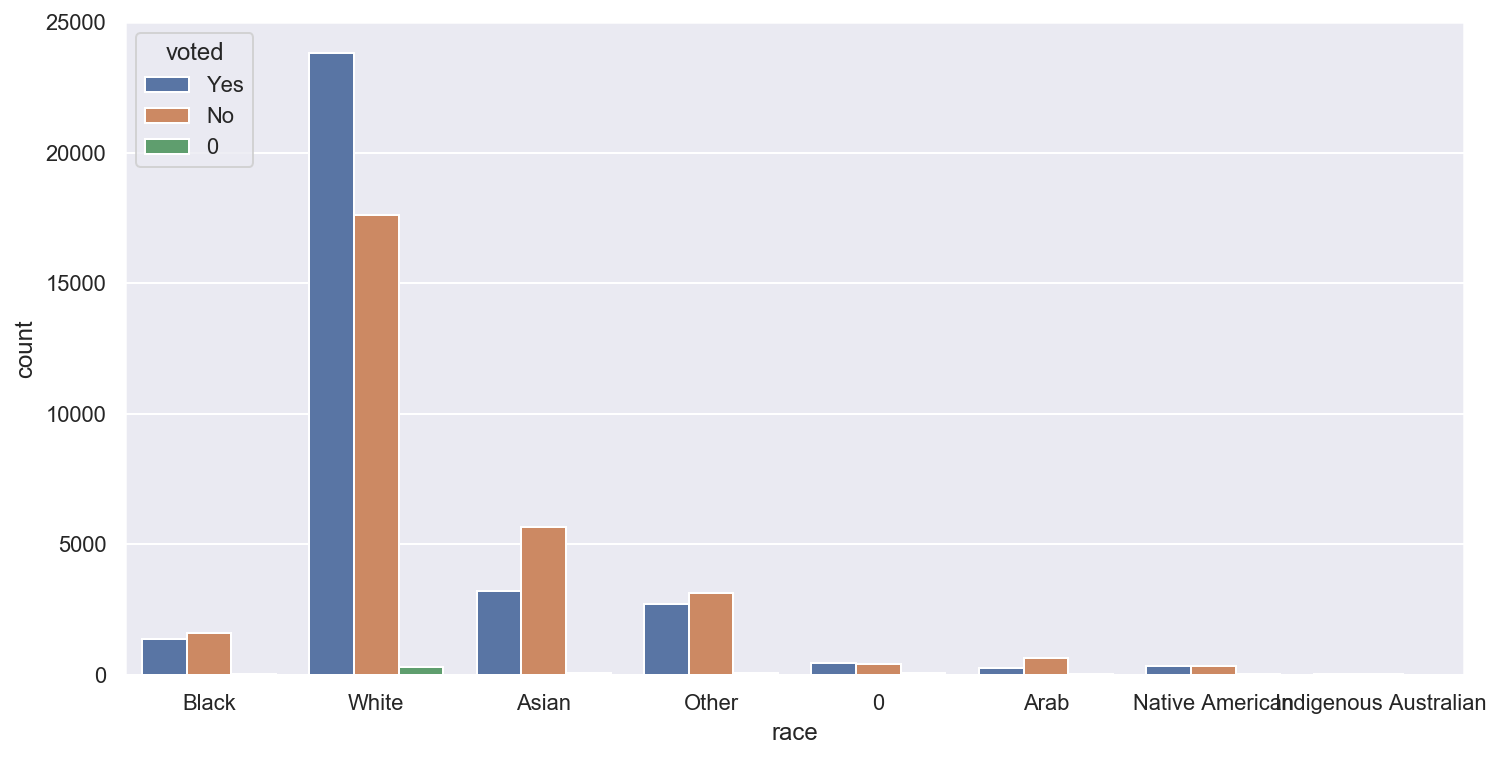

In [106]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['race'], hue=df['voted']);

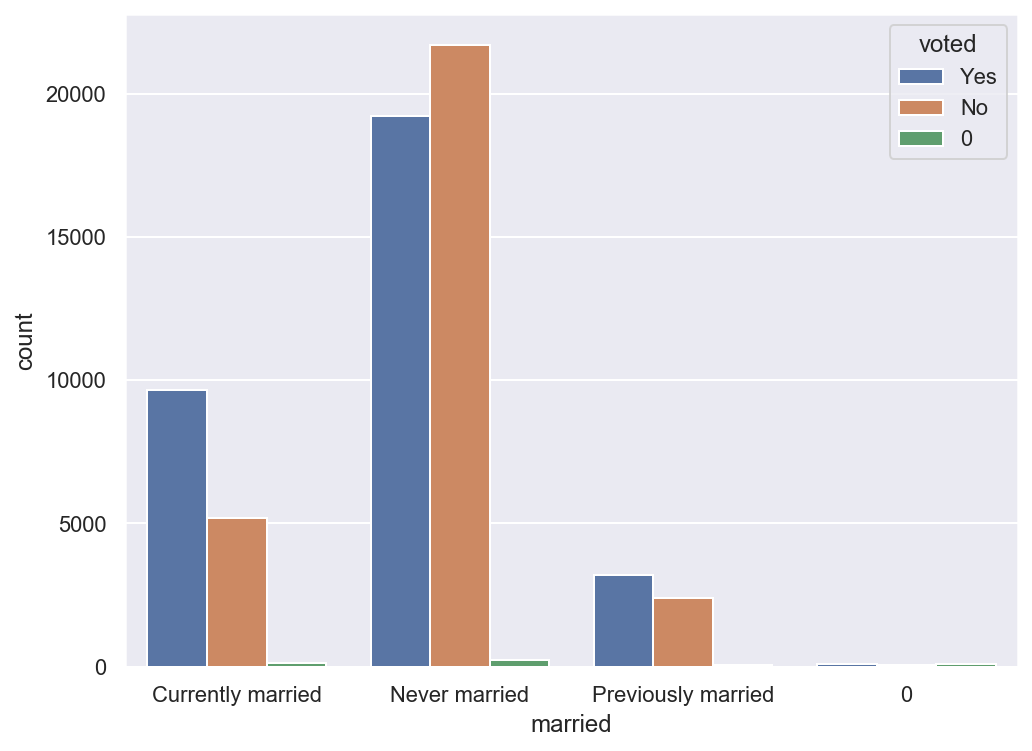

In [107]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['married'], hue=df['voted']);

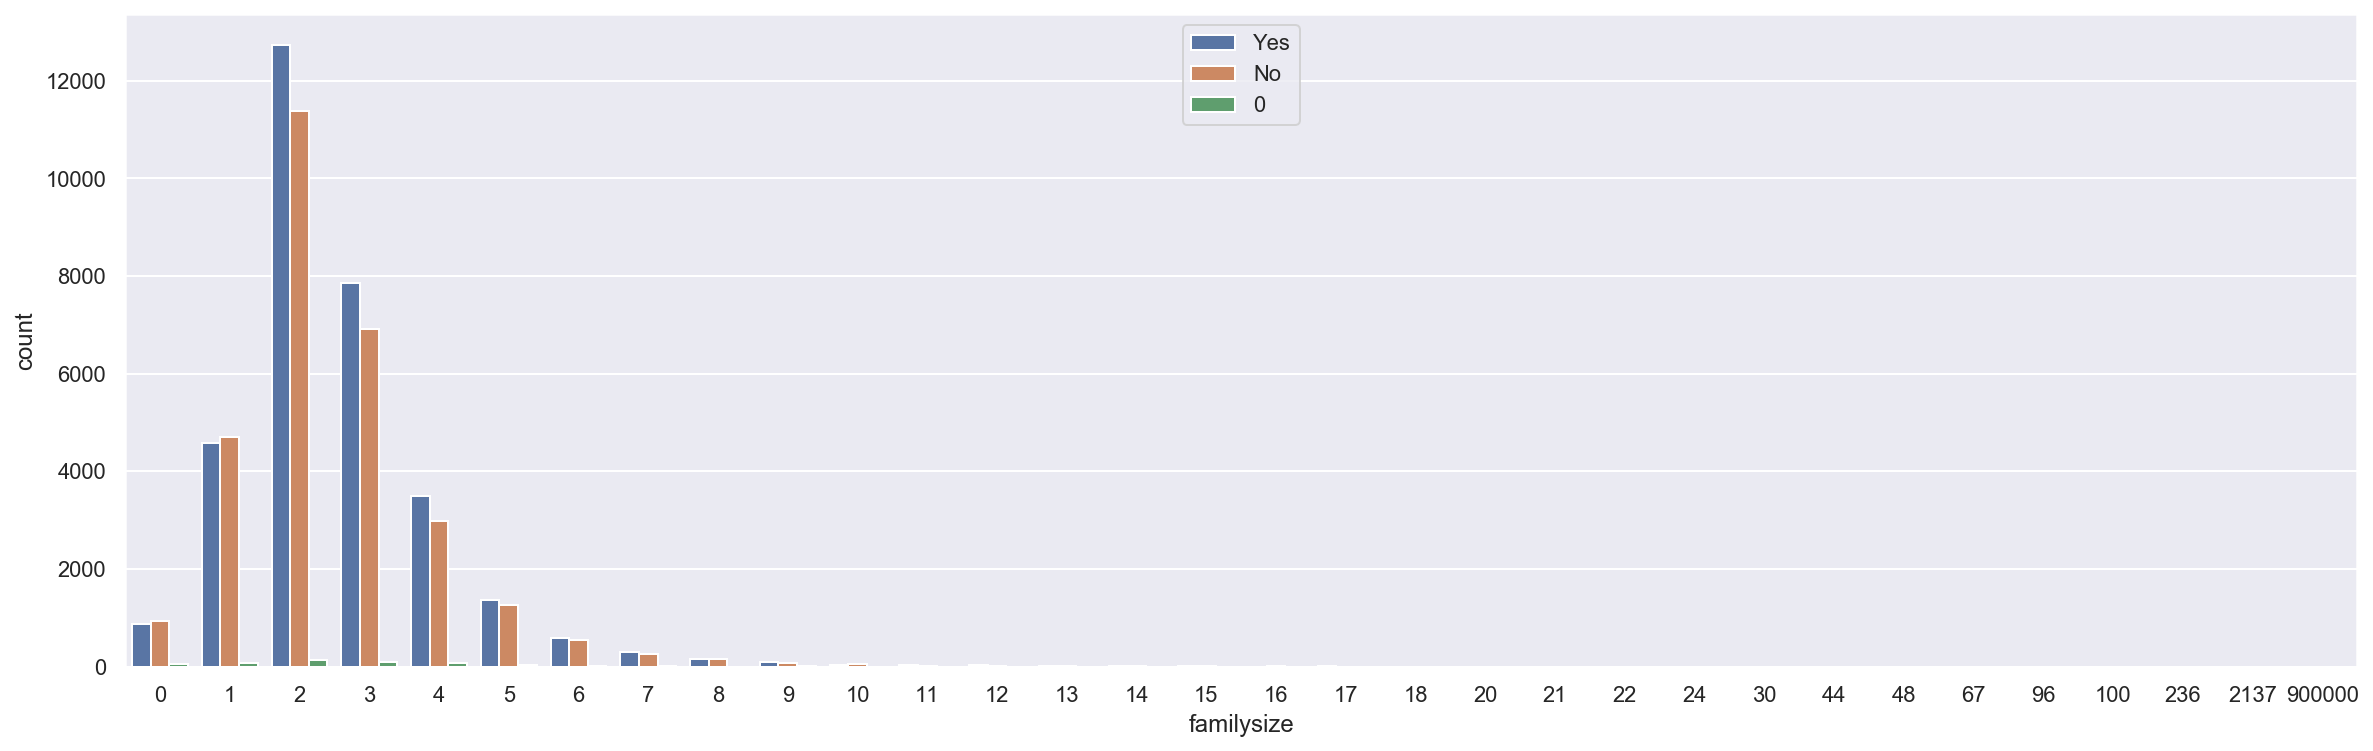

In [108]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['familysize'], hue=df['voted'])
plt.legend(loc='upper center');

In [109]:
majors = df['major'].str.lower()
majors = majors.str.strip()
majors.value_counts()

psychology                              3367
business                                1988
engineering                             1734
english                                 1501
computer science                        1435
                                        ... 
business & management and psychology       1
lái tàu                                    1
education and music                        1
economics politics and law                 1
òõêõ                                       1
Name: major, Length: 6380, dtype: int64

### COUNTRY

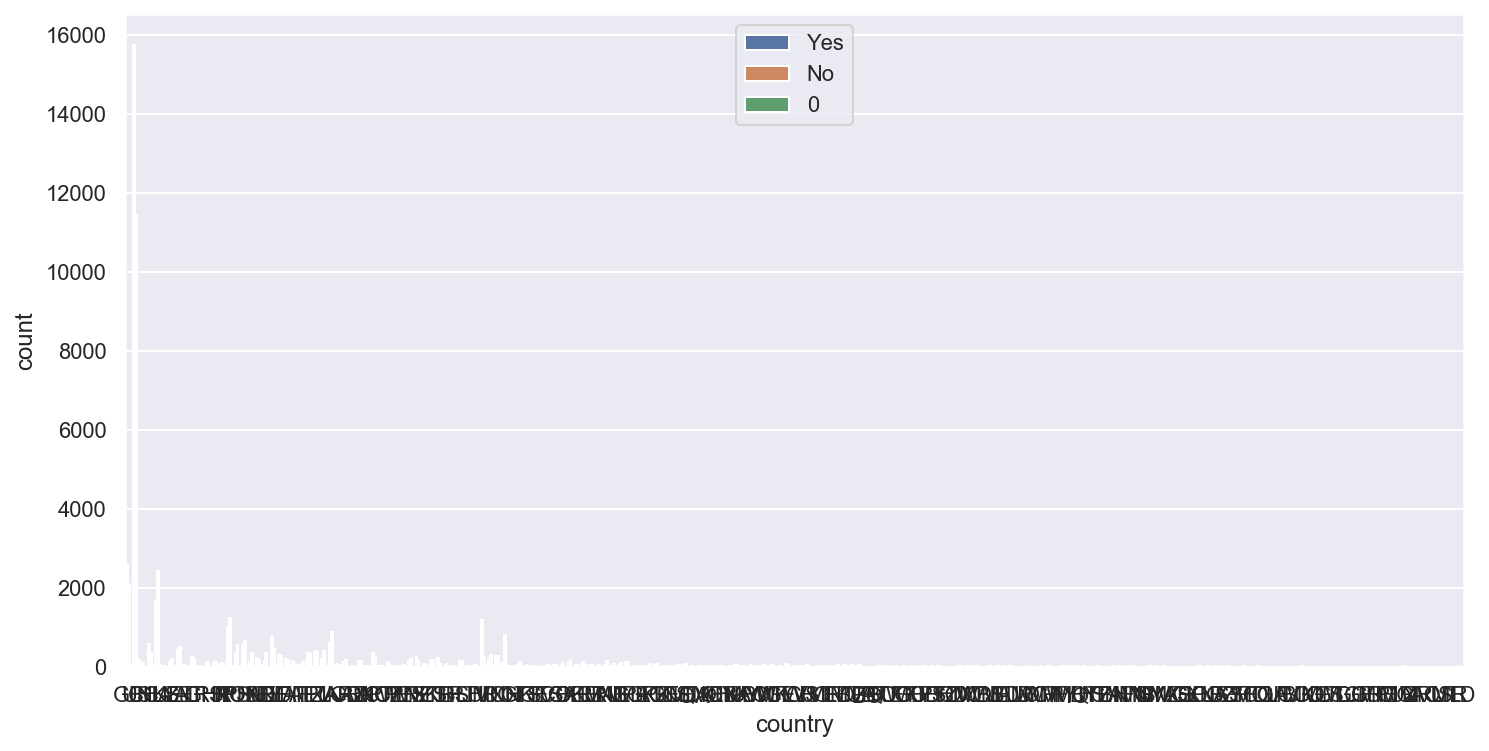

In [110]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['country'], hue=df['voted'])
plt.legend(loc='upper center');

In [111]:
df_cntr = df['country'].value_counts()
cntr_up100 = df_cntr[df_cntr > 100].index

In [112]:
cntr_up100

Index(['US', 'GB', 'CA', 'AU', 'IN', 'HU', 'DE', 'NONE', 'CN', 'NL', 'SE',
       'PH', 'PL', 'FR', 'ZA', 'ID', 'NO', 'RO', 'VN', 'MY', 'SG', 'IT', 'BR',
       'NZ', 'FI', 'MX', 'IE', 'ES', 'TR', 'GR', 'BE', 'PT', 'DK', 'AT', 'BG',
       'RS', 'HR', 'CH', 'RU', 'CZ', 'AE', 'KE', 'HK', 'JP', 'TW', 'SI', 'IL',
       'PK', 'TH', 'SK', 'AR'],
      dtype='object')

In [113]:
idx_list = []
for idx, x in enumerate(df['country']):
    if x in cntr_up100 :
        idx_list.append(idx)
len(idx_list)

59457

In [114]:
df_cntr_100 = df.iloc[idx_list]
df_cntr_100

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,orientation,race,voted,married,familysize,major,score,v_score,t_score,m_score
0,3.0,6.0,21.0,3.0,7.0,19.0,5.0,20.0,15.0,2.0,...,Heterosexual,Black,Yes,Currently married,5,Marketing,75.0,35.0,33.0,7.0
1,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Heterosexual,White,No,Never married,2,mathematics,91.0,37.0,45.0,9.0
3,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Heterosexual,White,Yes,Previously married,2,international relations,78.0,37.0,36.0,5.0
4,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Homosexual,White,Yes,Never married,2,Management,85.0,35.0,41.0,9.0
6,3.0,11.0,4.0,3.0,10.0,4.0,2.0,17.0,5.0,4.0,...,Heterosexual,White,Yes,Never married,2,NaN,66.0,28.0,31.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Heterosexual,Asian,No,Currently married,1,business,59.0,28.0,26.0,5.0
73485,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Homosexual,White,No,Never married,2,sociology,90.0,37.0,43.0,10.0
73486,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Heterosexual,White,No,Never married,3,NaN,69.0,34.0,27.0,8.0
73487,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,Heterosexual,Asian,Yes,Never married,4,Business,53.0,25.0,22.0,6.0


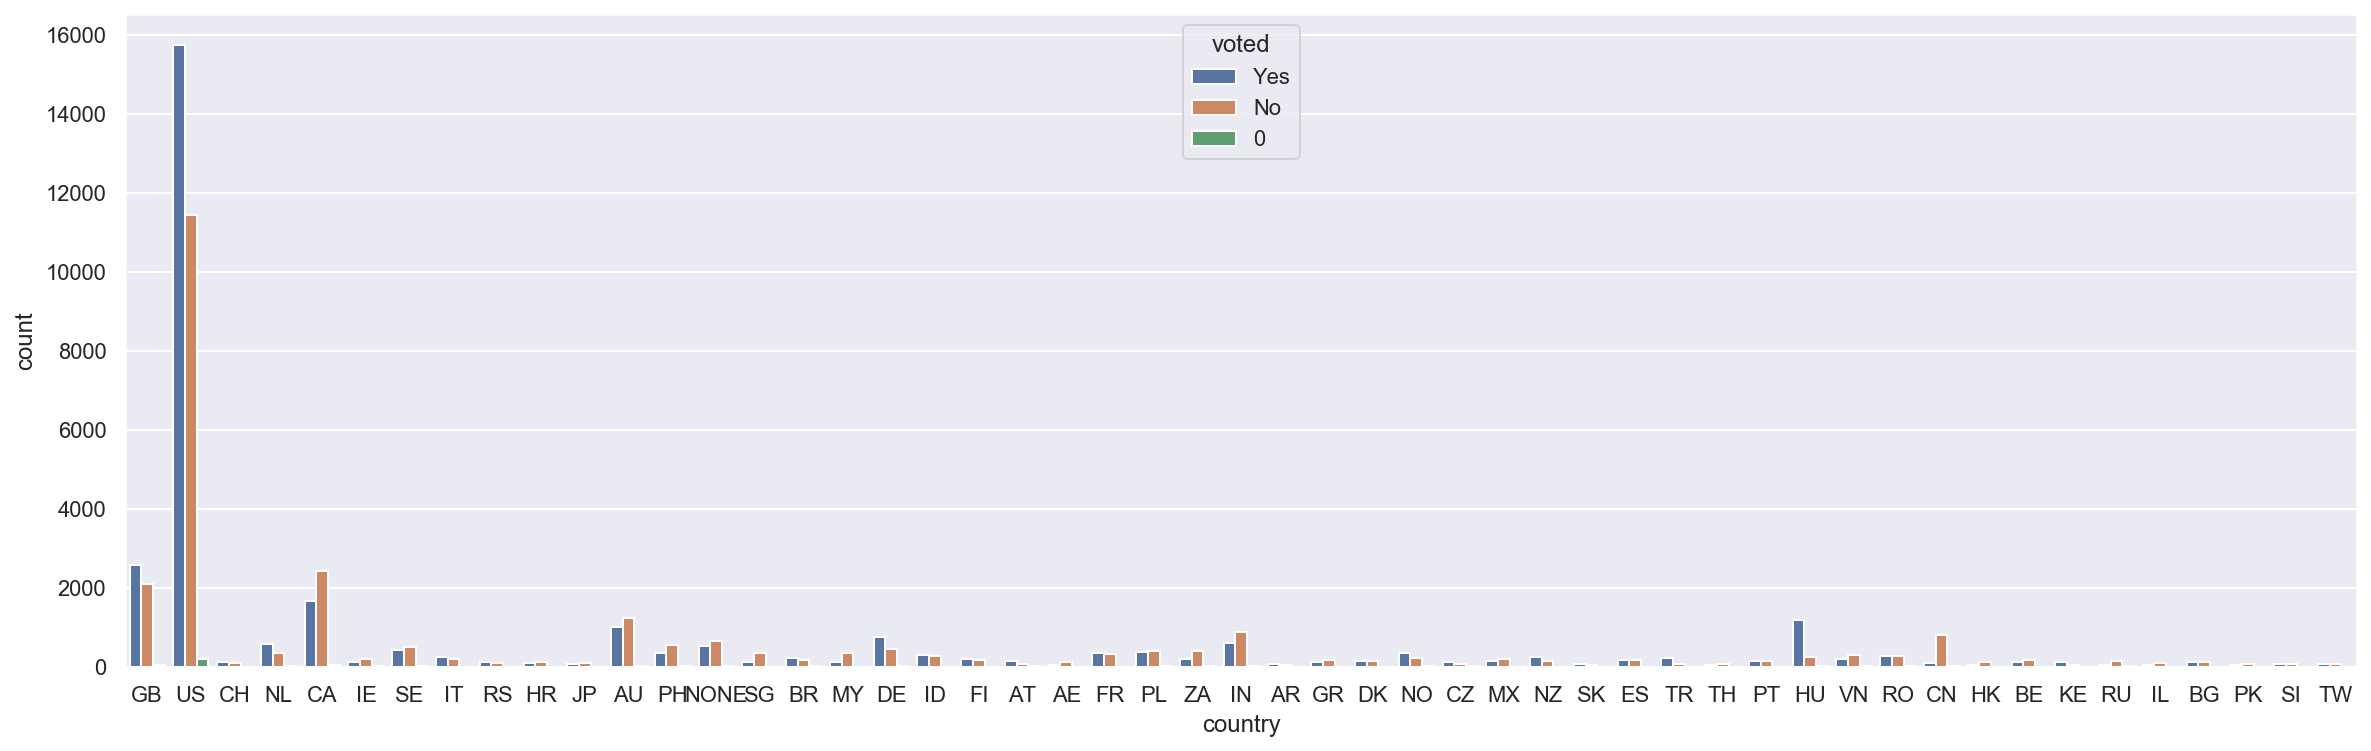

In [115]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df_cntr_100['country'], hue=df_cntr_100['voted']);

### screen size

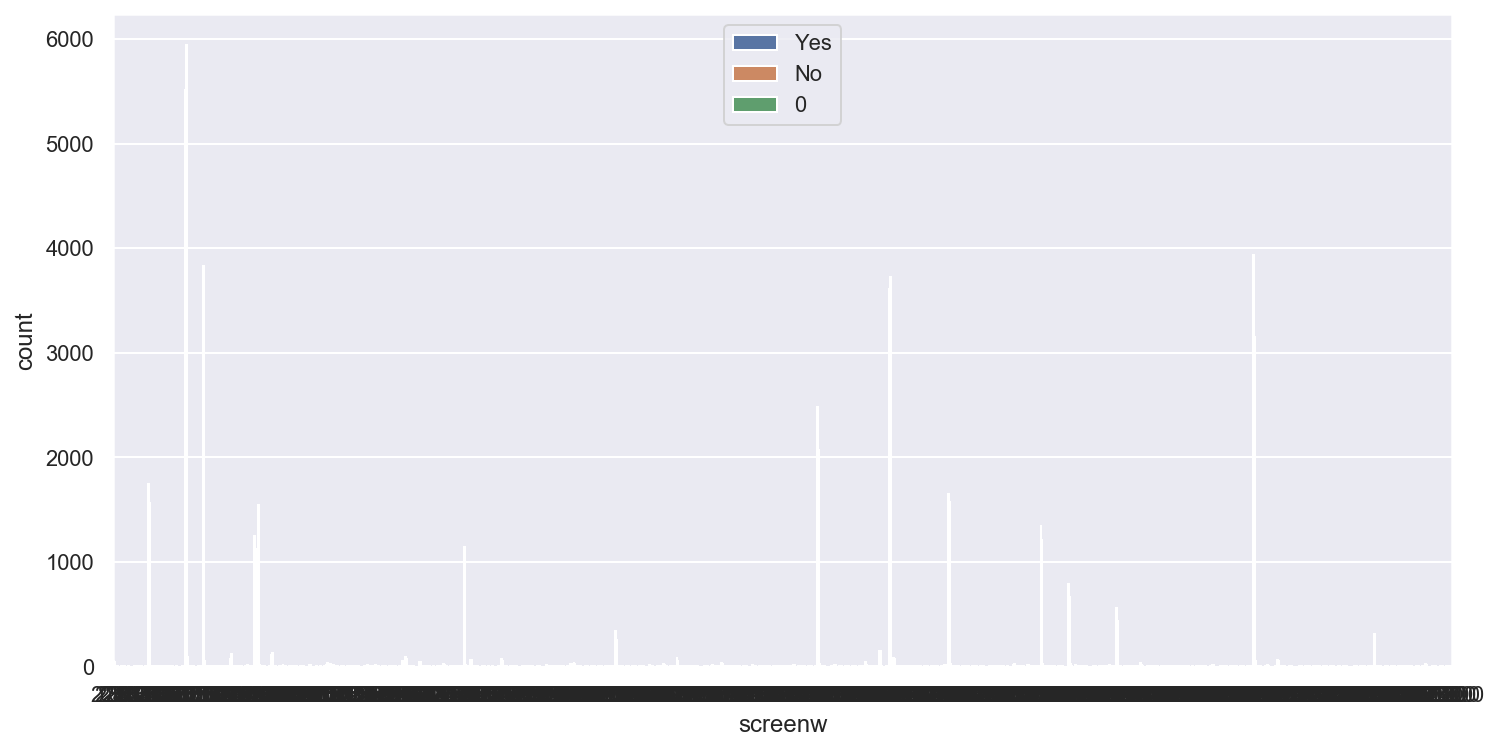

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['screenw'], hue=df['voted'])
plt.legend(loc='upper center');

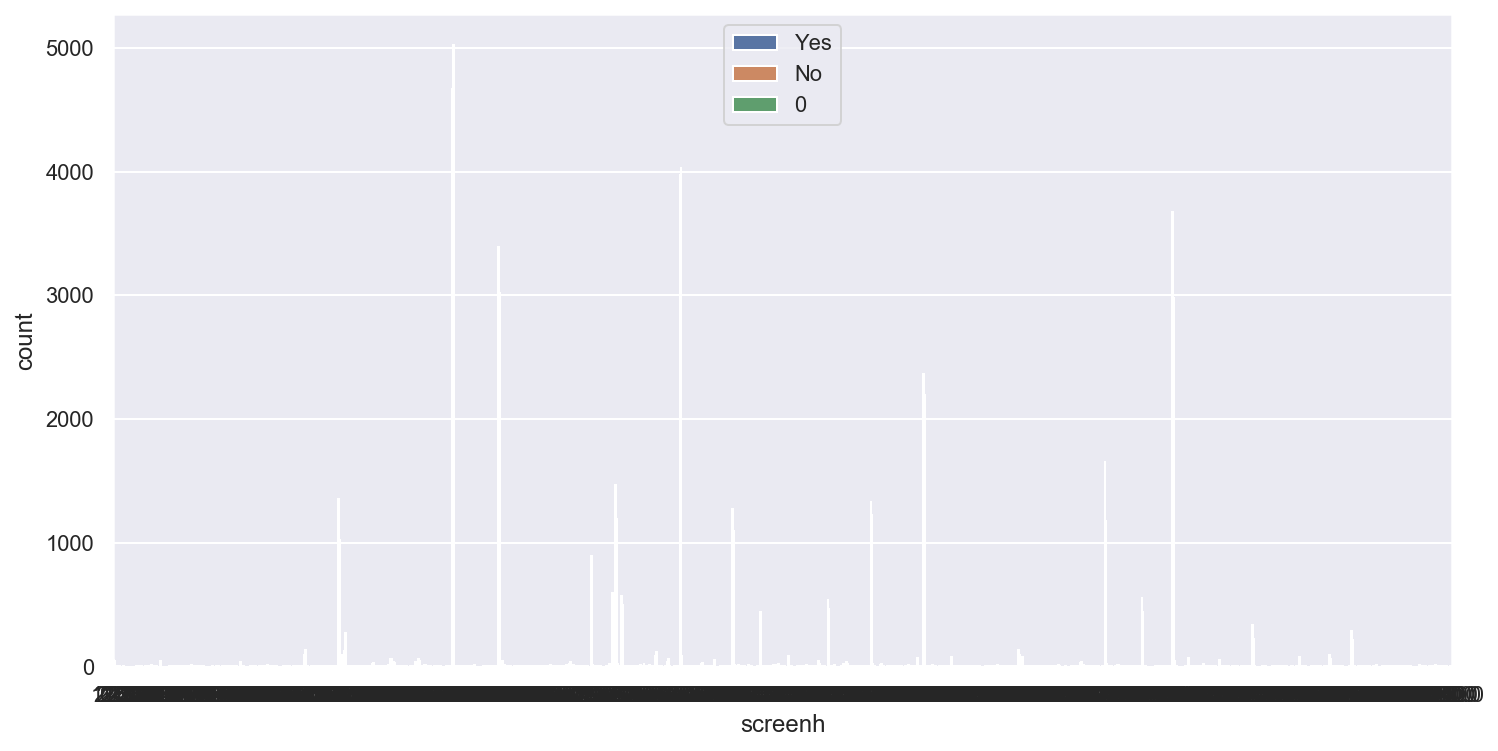

In [117]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['screenh'], hue=df['voted'])
plt.legend(loc='upper center');

### duration

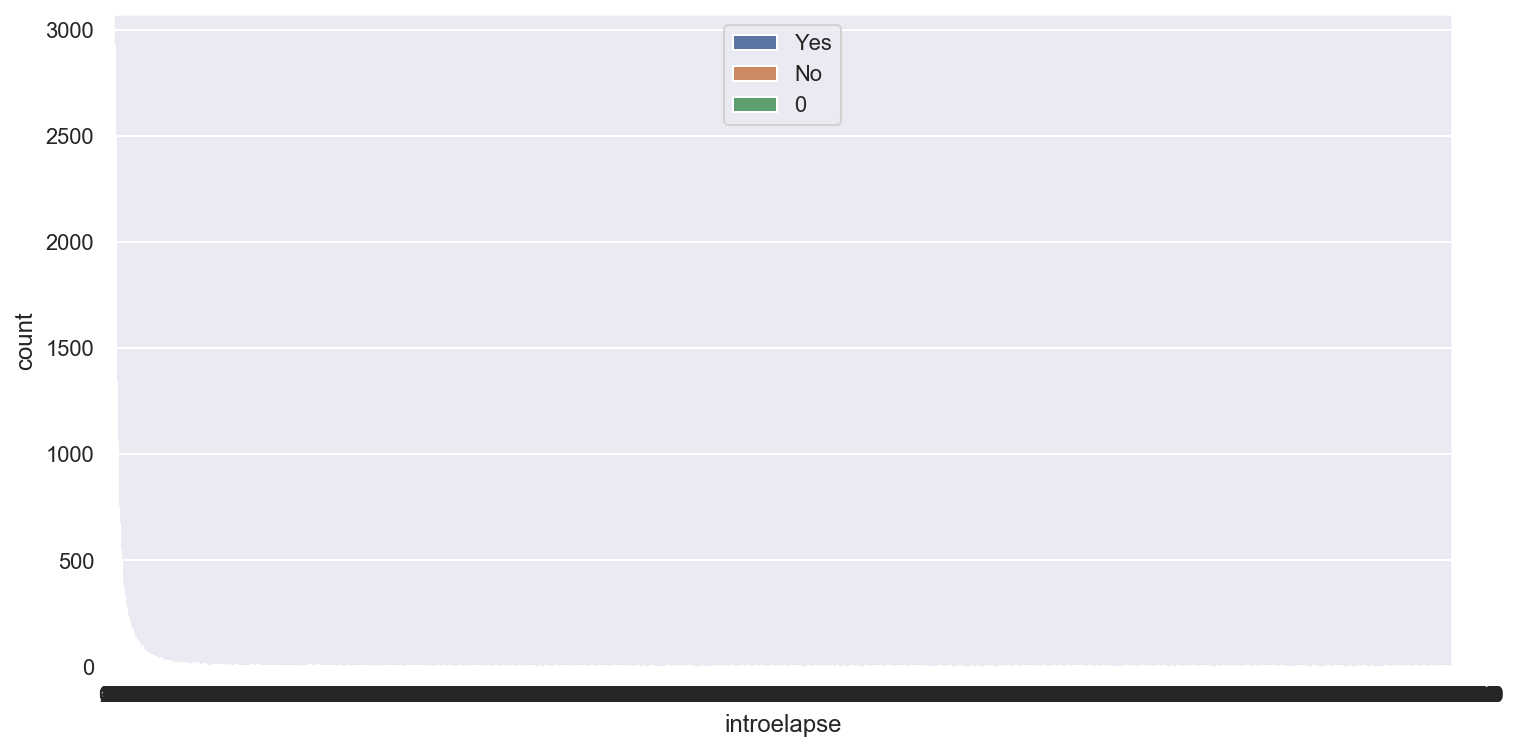

In [118]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['introelapse'], hue=df['voted'])
plt.legend(loc='upper center');

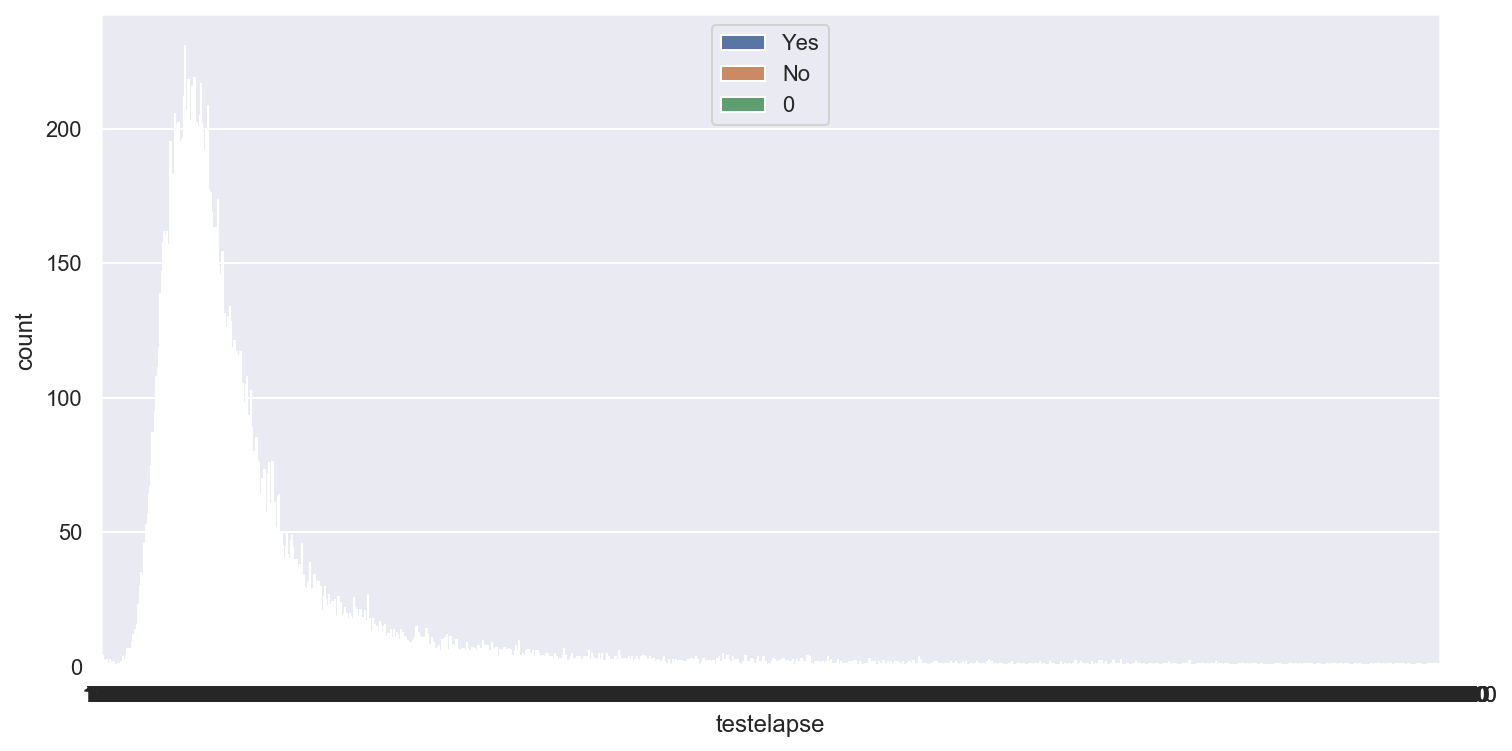

In [119]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['testelapse'], hue=df['voted'])
plt.legend(loc='upper center');

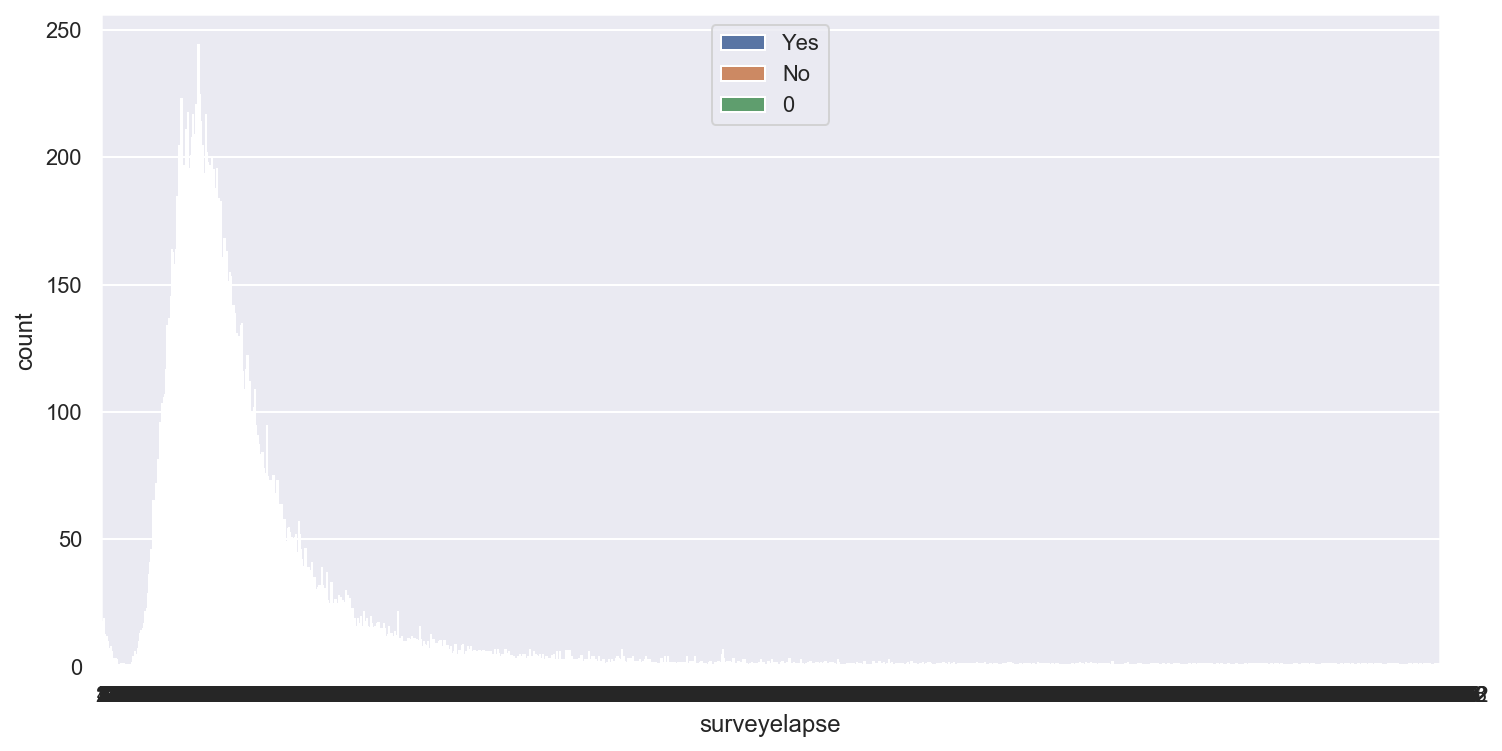

In [120]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['surveyelapse'], hue=df['voted'])
plt.legend(loc='upper center');

### function for drawing "voted_yes" rate graph

In [121]:
survey_cols = list(df.columns[-19:][:-1])

In [122]:
survey_cols.remove("voted")
survey_cols.remove("major")
print(survey_cols)

['education', 'urban', 'gender', 'engnat', 'age', 'screenw', 'screenh', 'hand', 'religion', 'orientation', 'race', 'married', 'familysize', 'score', 'v_score', 't_score']


In [123]:
def mk_crosstab(col_name):
    df_name = pd.crosstab(df[col_name], df['voted'])
    df_name["diff"] = (df_name["Yes"]/(df_name["Yes"]+df_name["No"]+df_name["0"])) 
    return df_name["diff"].sort_values().plot(kind="bar")

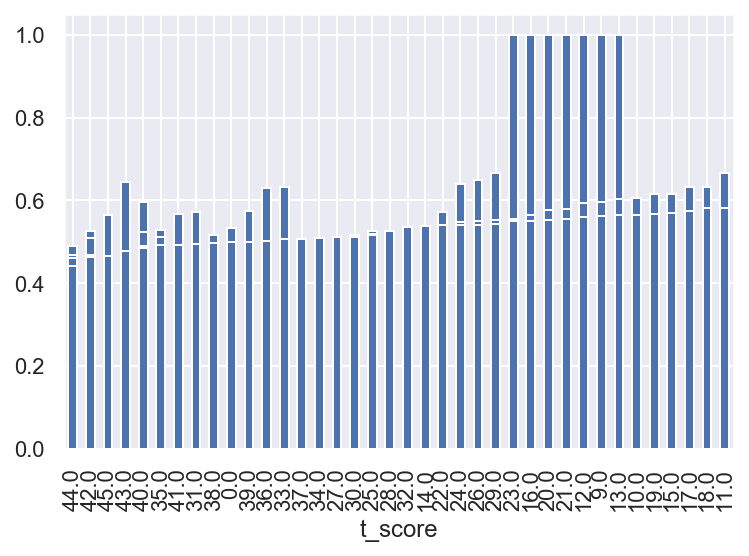

In [124]:
for col_name in survey_cols:
    mk_crosstab(col_name)
    plt.savefig('../MACH_data/graph_img/voted_rate_graph_{}.png'.format(col_name), dpi=200, bbox_inches="tight")

In [543]:
# %%writefile EDAGraphs.py

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../MACH_data/raw_data_for_EDA.csv')

class EDA_graph():
    def __init__(self):
        self.df = df

    survey_cols = list(df.columns[-19:][:-1])
    survey_cols.remove("voted")
    survey_cols.remove("major")

    
    # 1. 각 Feature별 단순 투표량 비교 수치 시각화
    def voted_rate_graph(self, col_name):
        df_name = pd.crosstab(df[col_name], df['voted'])
        df_name["diff"] = (df_name["Yes"]/(df_name["Yes"]+df_name["No"]+df_name["0"])) 
        return df_name["diff"].sort_values().plot(kind="bar")
    
    
    # 2. 각 Feature별 투표율 비교 수치 시각화
    def voted_rate_graph(self, col_name):
        df_name = pd.crosstab(df[col_name], df['voted'])
        df_name["diff"] = (df_name["Yes"]/(df_name["Yes"]+df_name["No"]+df_name["0"])) 
        return df_name["diff"].sort_values().plot(kind="bar")

    
    # 3. 각 그래프 이미지 저장
    def save_as_img(self, def_name):
        for col_name in survey_cols:
            self.def_name(col_name)
            plt.savefig('../MACH_data/voted_rate_graph_{}.png'.format(col_name), dpi=200, bbox_inches="tight")
        
        
    





IndentationError: expected an indented block (<ipython-input-543-86371fbe7933>, line 15)

### function for drawing "Simple EDA" graphs

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['surveyelapse'], hue=df['voted'])